# Data Loading

In [ ]:
import pandas as pd
import numpy as np
import random

# Set seeds
np.random.seed(42)
random.seed(42)

df = pd.read_excel('DIB dataset and codebook.xlsx')

# Class Conversion
## (Add all the target columns and save the values in another column)
## (Convert those values between 0 and 1)
## (If <= 0.5, assign 0, otherwise assign 1)
## This will be our target column

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your dataframe and it already contains the OS columns

# Step 1: Add all the OS columns
df['Occupational_Stress_Sum'] = df[['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8',
                                    'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14',
                                    'OS15', 'OS16', 'OS17', 'OS18', 'OS19',
                                    'OS20', 'OS21', 'OS22', 'OS23',
                                    'OS24', 'OS25', 'OS26', 'OS27', 'OS28',
                                    'OS29', 'OS30', 'OS31',
                                    'OS32', 'OS33', 'OS34', 'OS35',
                                    'OS36', 'OS37', 'OS38', 'OS39',
                                    'OS40', 'OS41']].sum(axis=1)

# Step 2: Normalize the summed values between 0 and 1
scaler = MinMaxScaler()
df['Occupational_Stress_Normalized'] = scaler.fit_transform(df[['Occupational_Stress_Sum']])

# Step 3: Assign 0 or 1 based on the condition
df['Occupational_Stress_Target'] = df['Occupational_Stress_Normalized'].apply(lambda x: 0 if x <= 0.5 else 1)

# Optional: You might want to drop the intermediate columns if they are not needed
# df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])



In [ ]:
df.drop(columns=['OS1', 'OS2', 'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12', 'OS13', 'OS14', 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21', 'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27', 'OS28', 'OS29', 'OS30', 'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39', 'OS40', 'OS41'], inplace=True)
df = df.drop(columns=['Occupational_Stress_Sum', 'Occupational_Stress_Normalized'])

In [ ]:
df.head()

Age  Religion  Ethnicity  Marital status  Marriage period  No. of children  \
0    2         1          1               1                1                1   
1    2         1          1               1                2                1   
2    2         1          1               1                2                1   
3    3         1          1               2                1                2   
4    2         1          1               1                1                1   

   Educational level  Employment status  Working period  Household income  \
0                  6                  1               4                 7   
1                  6                  1               3                 4   
2                  6                  1               5                 7   
3                  5                  1               5                10   
4                  6                  1               3                 5   

   ...  JS34  JS35  JS36  JP1  JP2  JP3  JP4  JP5  JP6  \
0  ...     4     4     4    4    4    4    2    5    5   
1  ...     3     5     5    5    5    4    5    5    5   
2  ...     5     5     5    5    5    5    5    5    5   
3  ...     5     5     5    2    2    2    4    5    5   
4  ...     5     5     5    5    5    5    5    5    5   

   Occupational_Stress_Target  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  

[5 rows x 54 columns]

In [ ]:
df.tail()

Age  Religion  Ethnicity  Marital status  Marriage period  \
304    4         1          1               2                2   
305    2         1          1               1                2   
306    2         1          1               1                3   
307    3         1          1               2                1   
308    2         1          1               1                2   

     No. of children  Educational level  Employment status  Working period  \
304                2                  6                  1               5   
305                2                  9                  1               5   
306                1                  6                  1               5   
307                3                  5                  1               5   
308                1                  6                  1               5   

     Household income  ...  JS34  JS35  JS36  JP1  JP2  JP3  JP4  JP5  JP6  \
304                 7  ...     4     4     4    5    5    5    5    5    5   
305                 8  ...     2     2     2    4    4    2    4    4    4   
306                 2  ...     4     5     4    5    5    5    5    5    5   
307                 2  ...     2     2     2    4    4    4    4    4    5   
308                 6  ...     4     4     4    4    4    4    5    5    5   

     Occupational_Stress_Target  
304                           1  
305                           0  
306                           1  
307                           0  
308                           0  

[5 rows x 54 columns]

# Data Inspection (Statistical)

In [ ]:
import pandas as pd

# Assuming df is your DataFrame after loading the data and preprocessing the target column

# Step 1: Basic Structure
print("DataFrame Shape (Rows, Columns):", df.shape)
print("\nFirst 5 Rows of DataFrame:")
print(df.head())

DataFrame Shape (Rows, Columns): (309, 54)

First 5 Rows of DataFrame:
   Age  Religion  Ethnicity  Marital status  Marriage period  No. of children  \
0    2         1          1               1                1                1   
1    2         1          1               1                2                1   
2    2         1          1               1                2                1   
3    3         1          1               2                1                2   
4    2         1          1               1                1                1   

   Educational level  Employment status  Working period  Household income  \
0                  6                  1               4                 7   
1                  6                  1               3                 4   
2                  6                  1               5                 7   
3                  5                  1               5                10   
4                  6                  1               3  

In [ ]:
# Step 2: Descriptive Statistics
print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())


Descriptive Statistics for Numerical Columns:
              Age    Religion   Ethnicity  Marital status  Marriage period  \
count  309.000000  309.000000  309.000000      309.000000       309.000000   
mean     2.165049    1.084142    1.129450        1.100324         1.883495   
std      0.604589    0.433246    0.560676        0.300918         0.772510   
min      1.000000    1.000000    1.000000        1.000000         1.000000   
25%      2.000000    1.000000    1.000000        1.000000         1.000000   
50%      2.000000    1.000000    1.000000        1.000000         2.000000   
75%      2.000000    1.000000    1.000000        1.000000         2.000000   
max      5.000000    4.000000    5.000000        2.000000         3.000000   

       No. of children  Educational level  Employment status  Working period  \
count       309.000000         309.000000         309.000000      309.000000   
mean          1.323625           6.019417           1.042071        4.433657   
std       

In [ ]:
# Step 3: Data Types
print("\nData Types of Each Column:")
print(df.dtypes)



Data Types of Each Column:
Age                           int64
Religion                      int64
Ethnicity                     int64
Marital status                int64
Marriage period               int64
No. of children               int64
Educational level             int64
Employment status             int64
Working period                int64
Household income              int64
Sperm quality                 int64
JS1                           int64
JS2                           int64
JS3                           int64
JS4                           int64
JS5                           int64
JS6                           int64
JS7                           int64
JS8                           int64
JS9                           int64
JS10                          int64
JS11                          int64
JS12                          int64
JS13                          int64
JS14                          int64
JS15                          int64
JS16                          int64


In [ ]:
# Step 4: Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                           0
Religion                      0
Ethnicity                     0
Marital status                0
Marriage period               0
No. of children               0
Educational level             0
Employment status             0
Working period                0
Household income              0
Sperm quality                 0
JS1                           0
JS2                           0
JS3                           0
JS4                           0
JS5                           0
JS6                           0
JS7                           0
JS8                           0
JS9                           0
JS10                          0
JS11                          0
JS12                          0
JS13                          0
JS14                          0
JS15                          0
JS16                          0
JS17                          0
JS18                          0
JS19                          0
JS20    

In [ ]:
# Step 5: Unique Values in Each Column (Especially useful for categorical data)
print("\nNumber of Unique Values in Each Column:")
print(df.nunique())


Number of Unique Values in Each Column:
Age                            5
Religion                       4
Ethnicity                      5
Marital status                 2
Marriage period                3
No. of children                3
Educational level              8
Employment status              3
Working period                 5
Household income              10
Sperm quality                  8
JS1                            5
JS2                            5
JS3                            5
JS4                            5
JS5                            5
JS6                            5
JS7                            5
JS8                            5
JS9                            5
JS10                           5
JS11                           5
JS12                           5
JS13                           5
JS14                           5
JS15                           5
JS16                           5
JS17                           5
JS18                           5
JS

In [ ]:
# Replace 'CATEGORICAL_COLUMN' with your actual categorical column names
for column in ['Religion', 'Ethnicity', 'Marital status']:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())


Value Counts for Religion:
Religion
1    297
3      8
4      3
2      1
Name: count, dtype: int64

Value Counts for Ethnicity:
Ethnicity
1    291
3     10
2      3
4      3
5      2
Name: count, dtype: int64

Value Counts for Marital status:
Marital status
1    278
2     31
Name: count, dtype: int64


# Exploratory Data Analysis (Later)

# Data Splitting

In [ ]:
import pandas as pd
# import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Split the data into training and test sets
# Let's separate features and target for splitting; replace 'YourFeatures' & 'Occupational_Stress_Target' with actual column names
X = df.drop(['Occupational_Stress_Target'], axis=1)  # Features
y = df['Occupational_Stress_Target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42) #31 diye run #manual seed diye run


# Normalization

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for easier handling
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Handle Outliers(Mean)

Age - Number of Outliers: 0


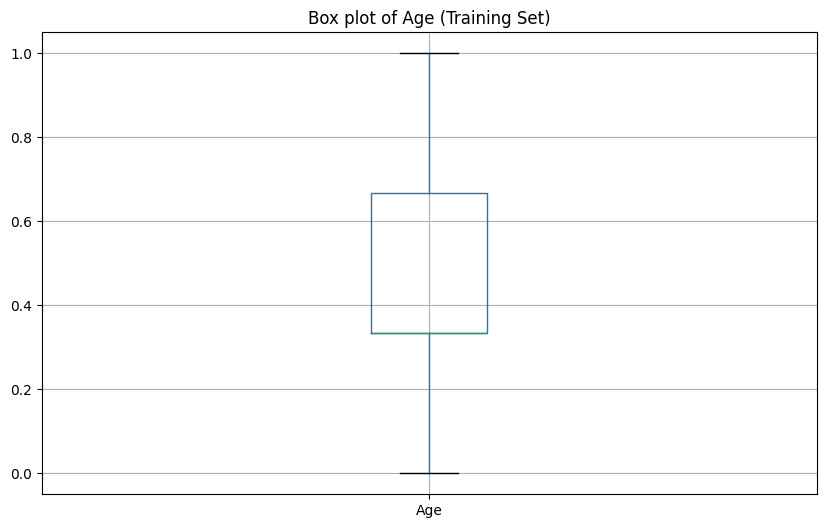

Religion - Number of Outliers: 11


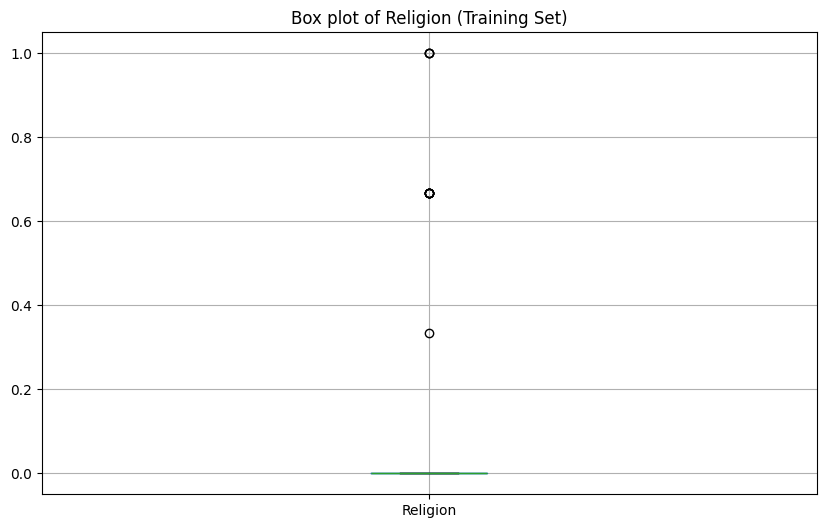

Ethnicity - Number of Outliers: 16


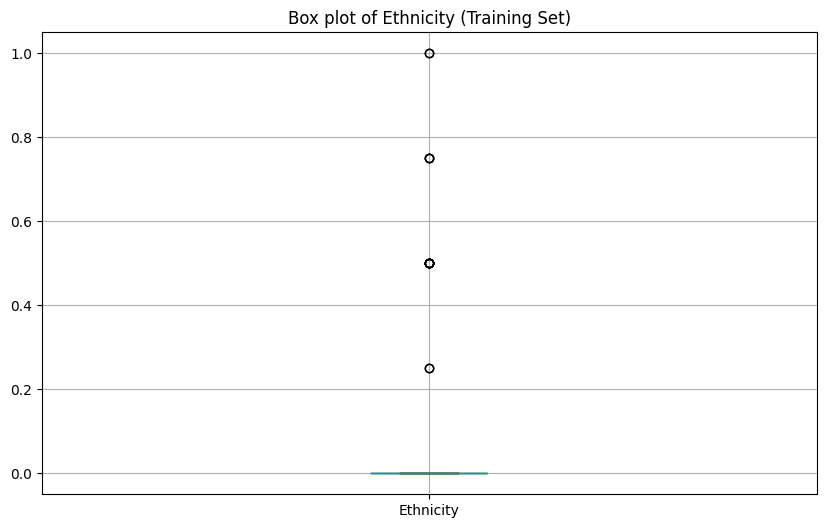

Marital status - Number of Outliers: 25


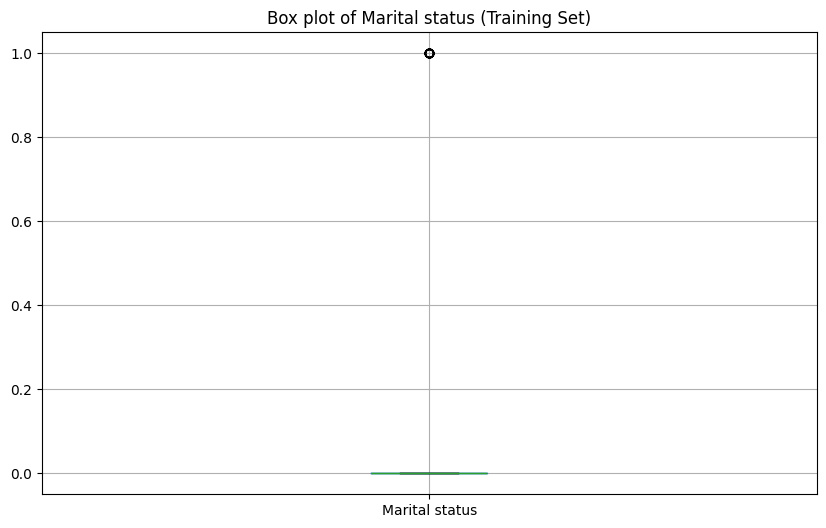

Marriage period - Number of Outliers: 0


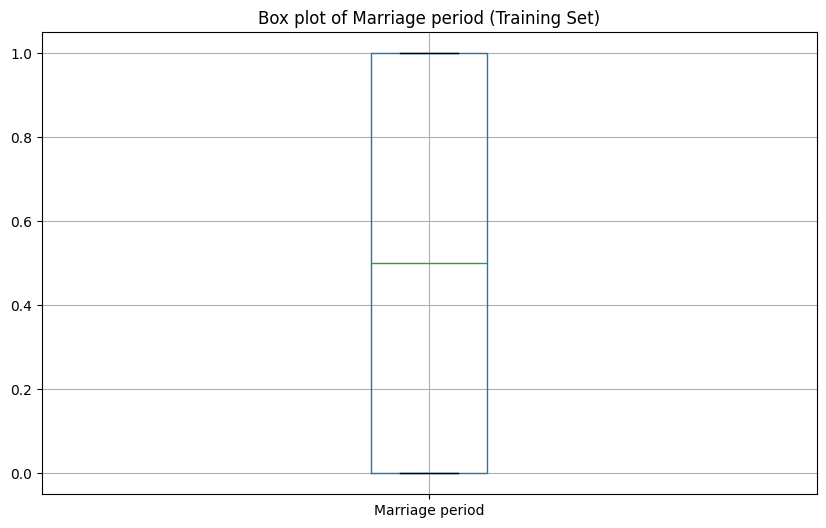

No. of children - Number of Outliers: 0


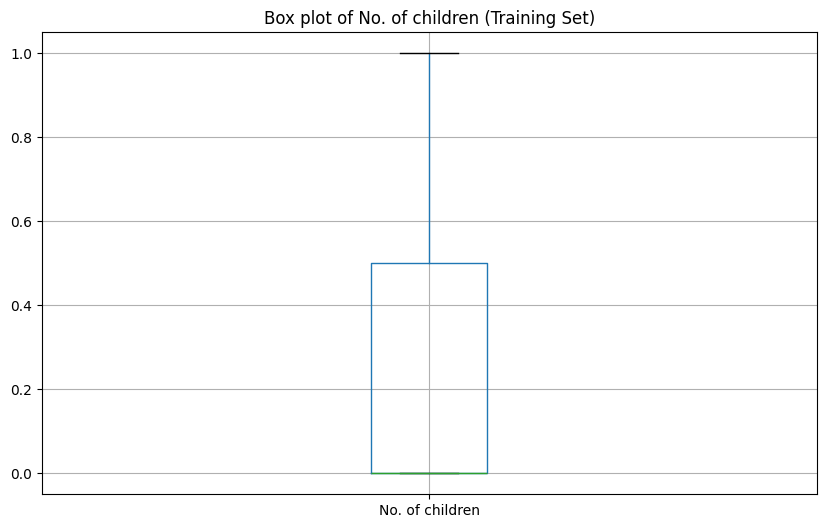

Educational level - Number of Outliers: 0


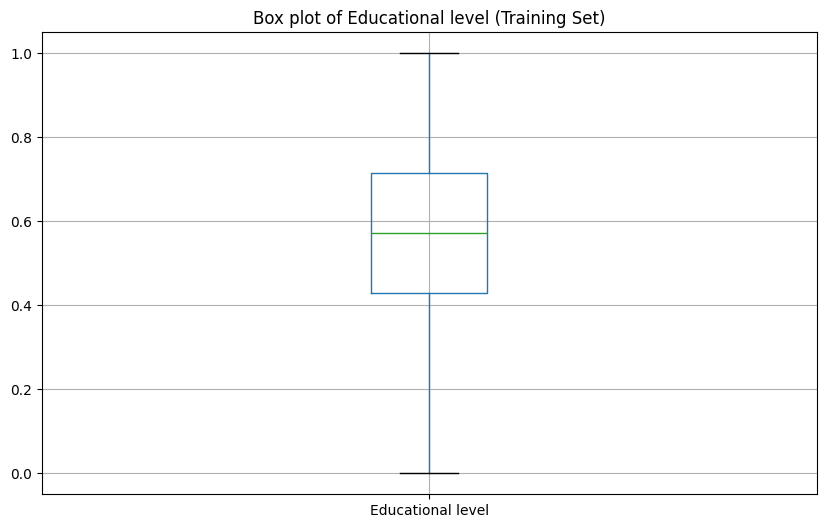

Employment status - Number of Outliers: 8


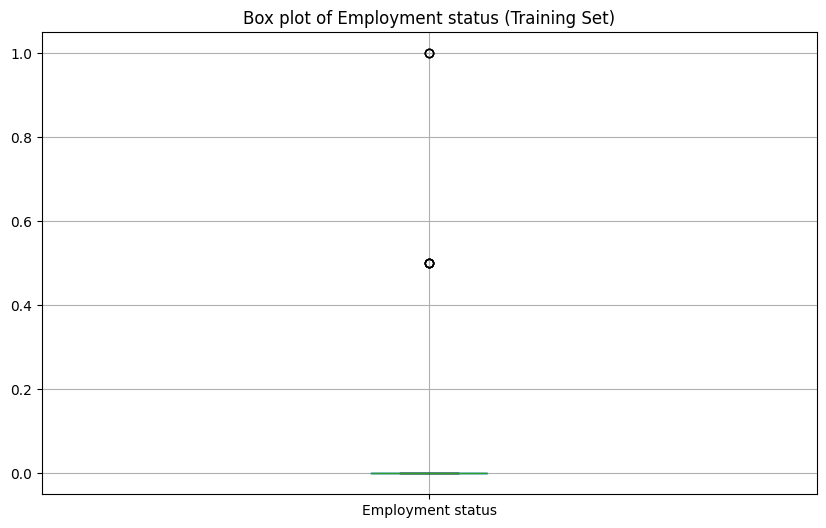

Working period - Number of Outliers: 13


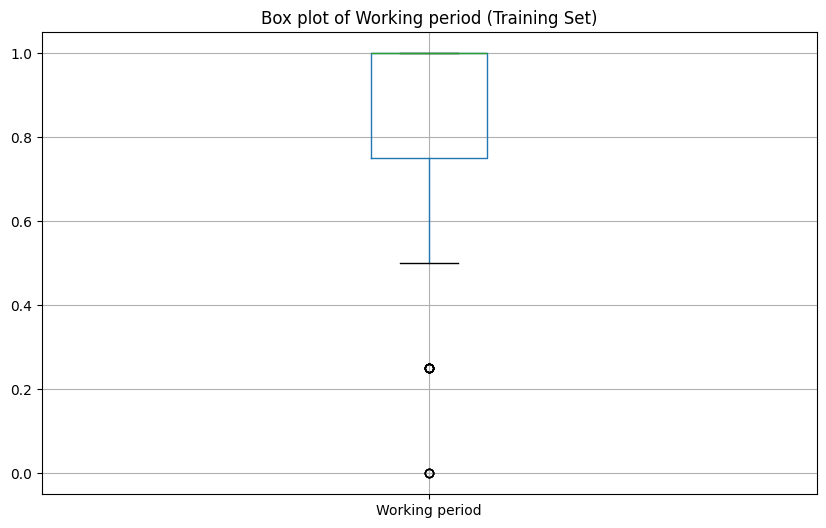

Household income - Number of Outliers: 0


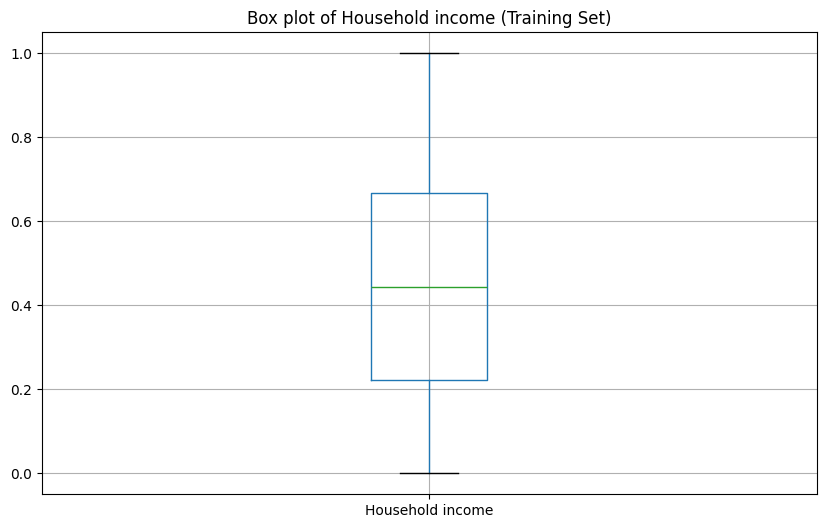

Sperm quality - Number of Outliers: 29


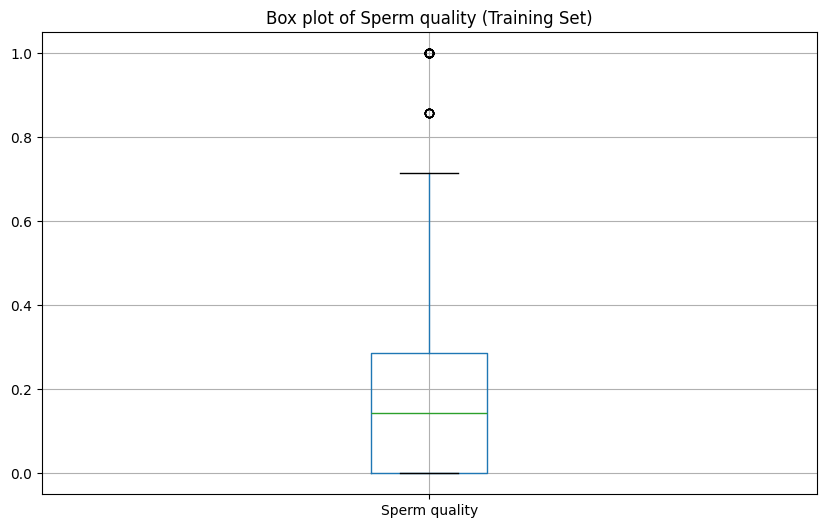

JS1 - Number of Outliers: 19


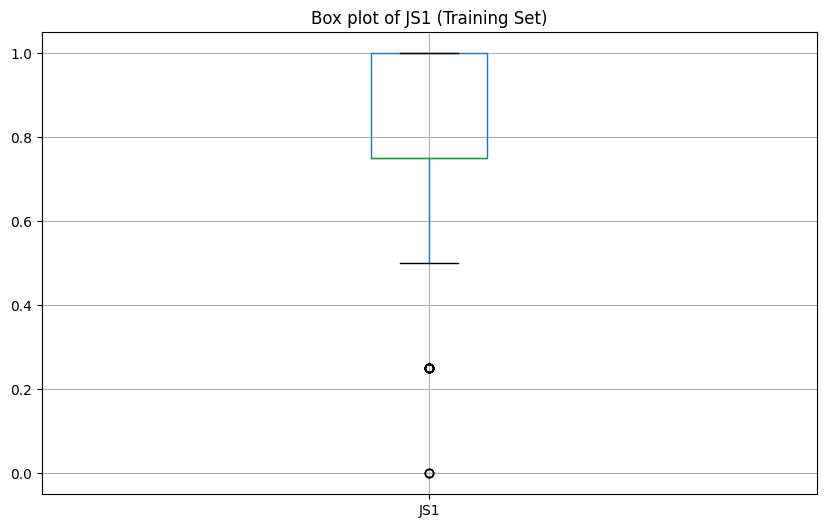

JS2 - Number of Outliers: 0


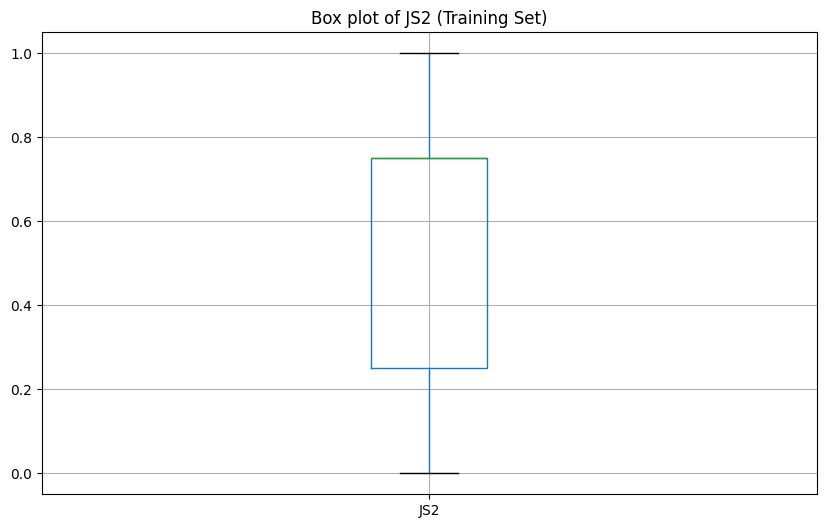

JS3 - Number of Outliers: 0


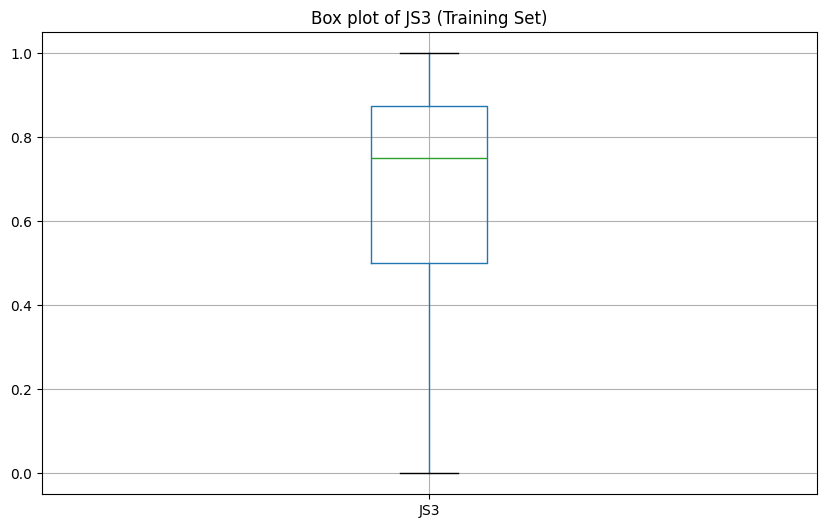

JS4 - Number of Outliers: 9


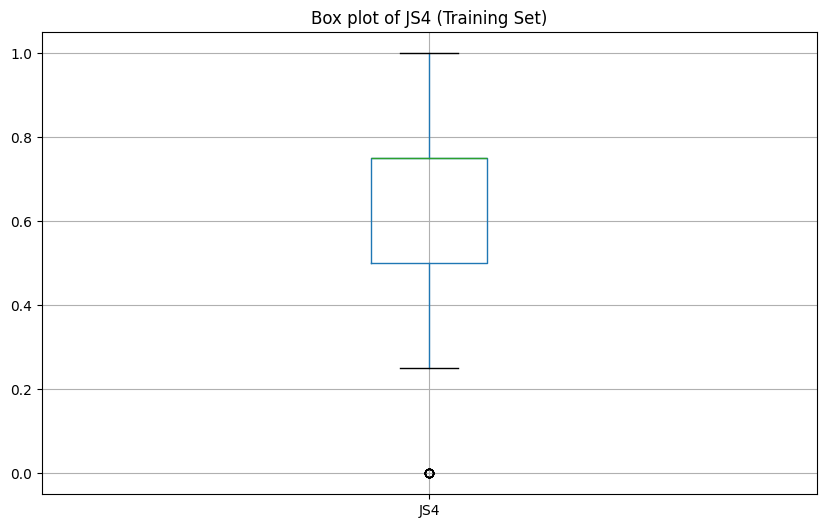

JS5 - Number of Outliers: 0


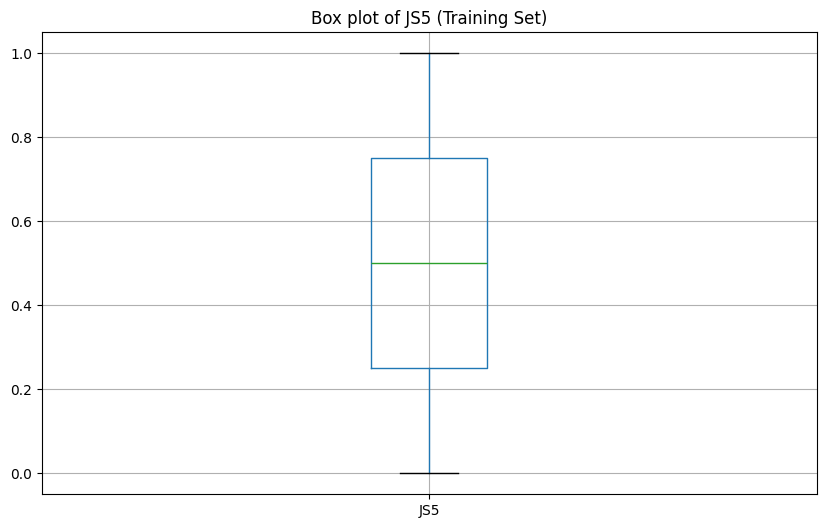

JS6 - Number of Outliers: 10


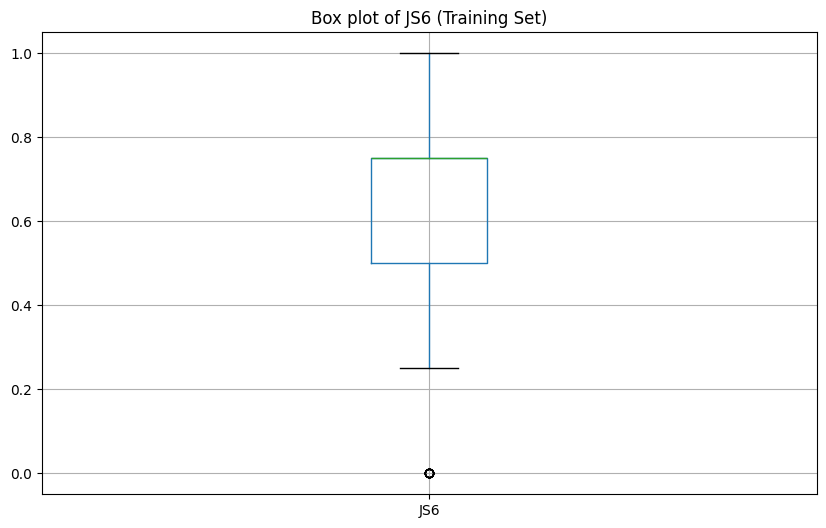

JS7 - Number of Outliers: 0


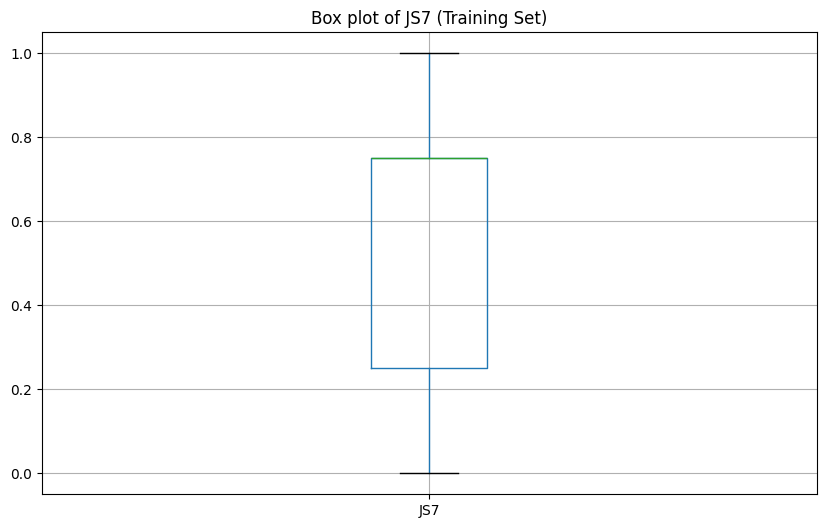

JS8 - Number of Outliers: 3


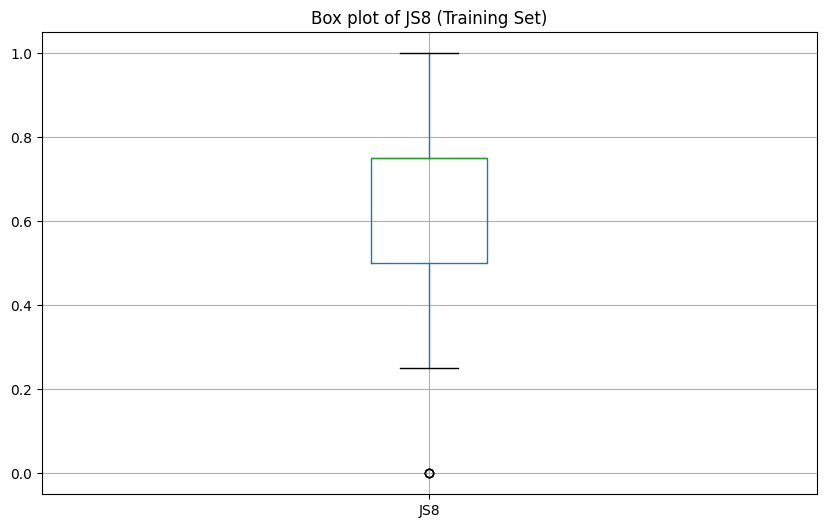

JS9 - Number of Outliers: 103


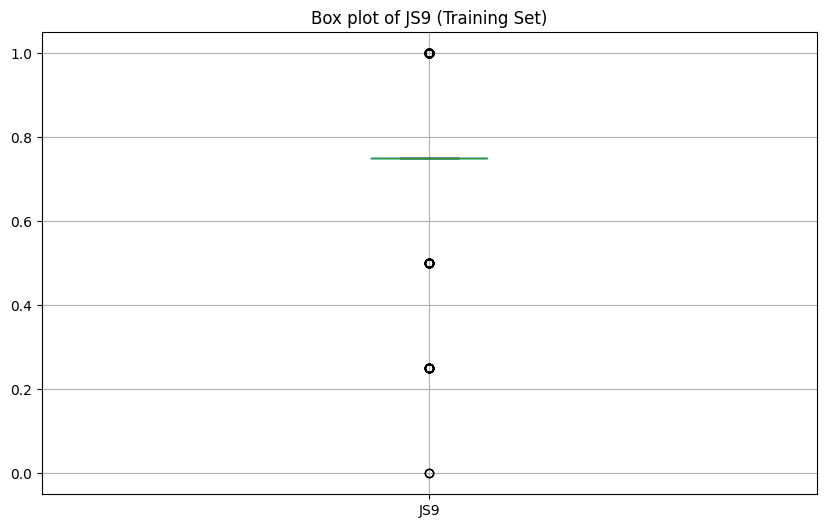

JS10 - Number of Outliers: 25


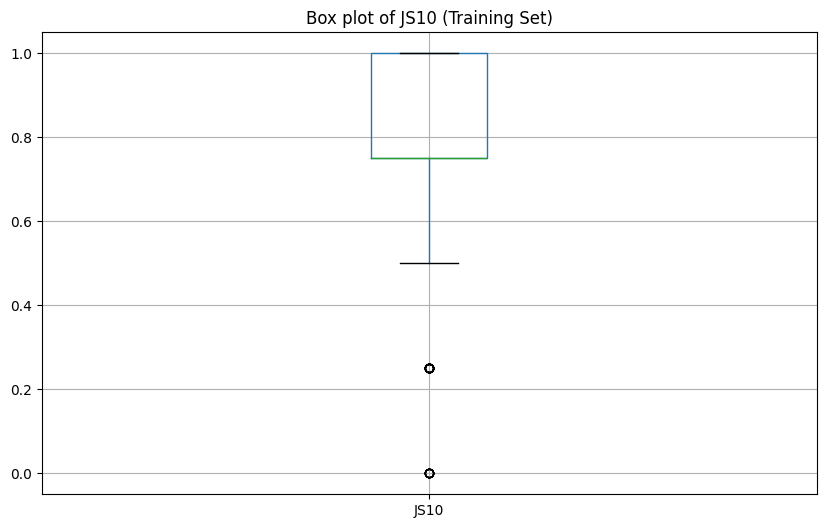

JS11 - Number of Outliers: 8


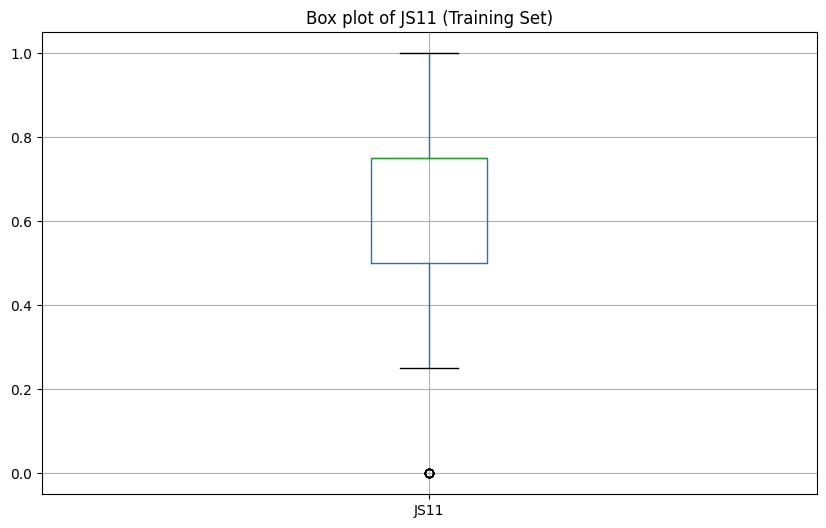

JS12 - Number of Outliers: 8


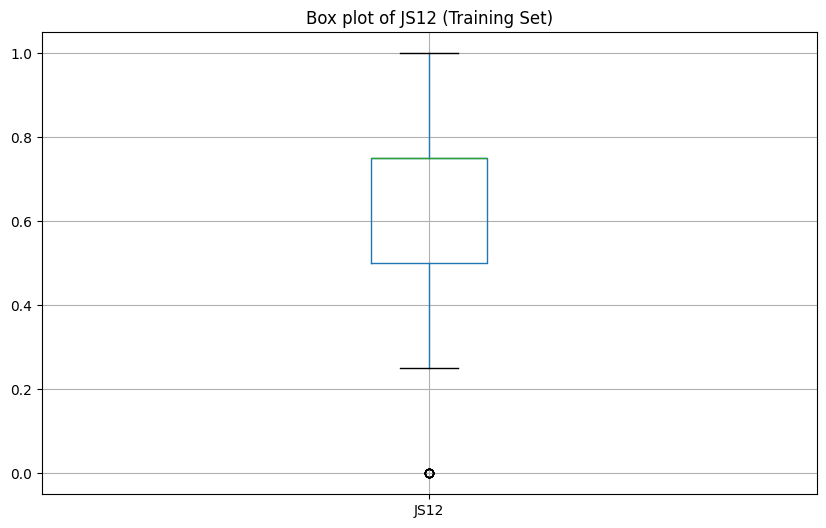

JS13 - Number of Outliers: 6


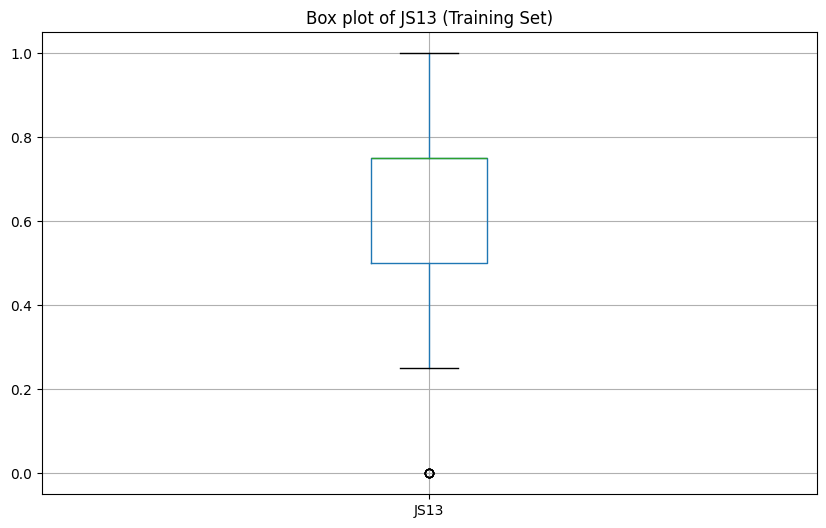

JS14 - Number of Outliers: 6


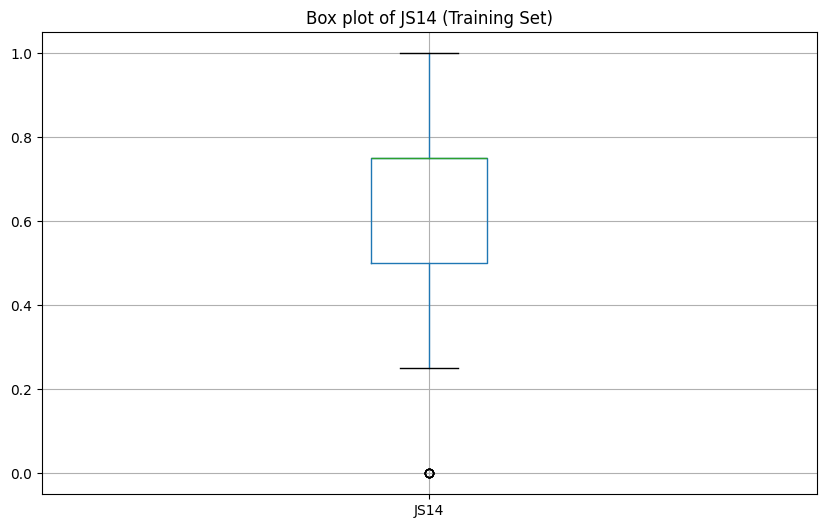

JS15 - Number of Outliers: 0


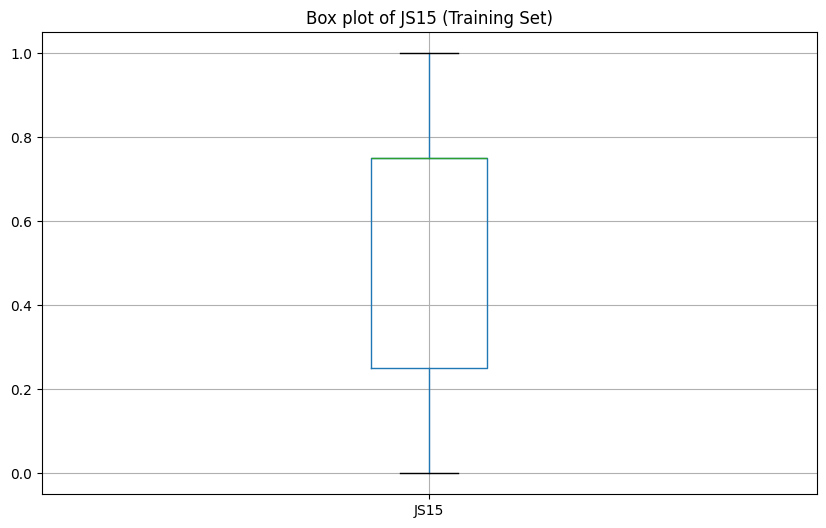

JS16 - Number of Outliers: 8


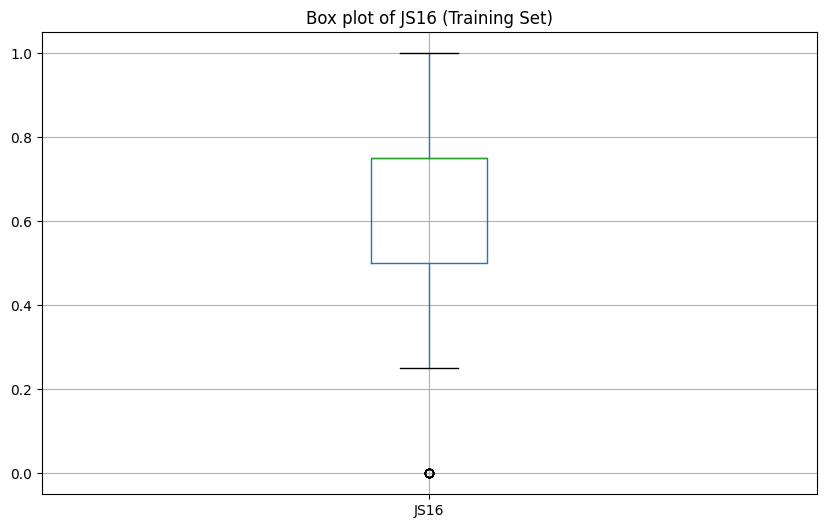

JS17 - Number of Outliers: 3


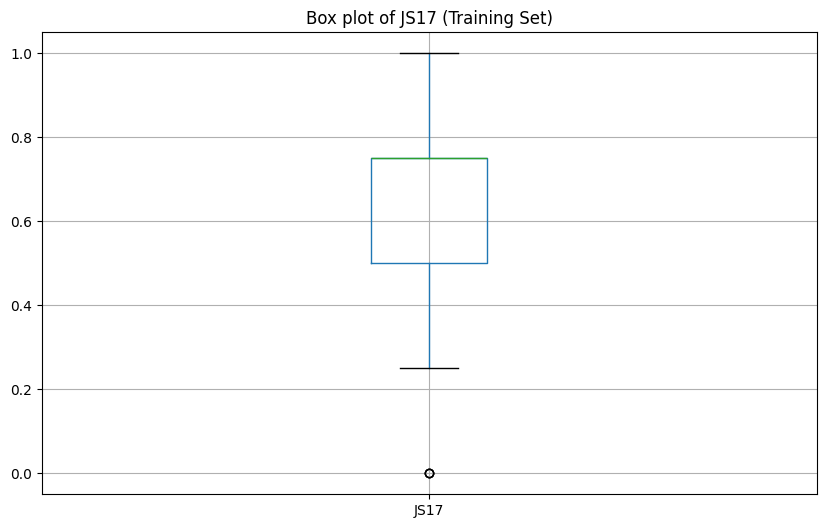

JS18 - Number of Outliers: 17


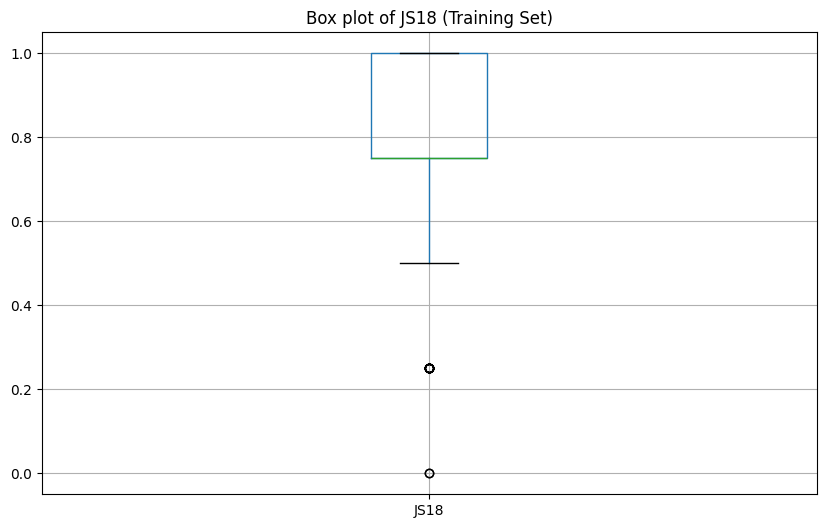

JS19 - Number of Outliers: 4


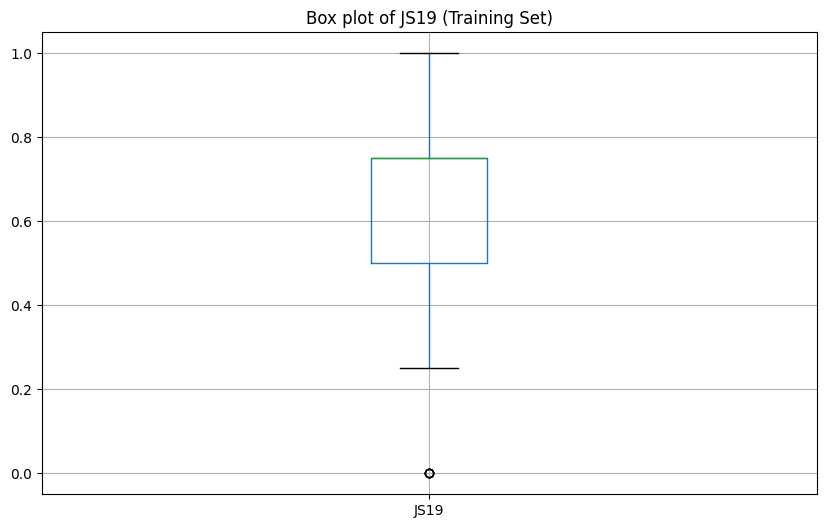

JS20 - Number of Outliers: 4


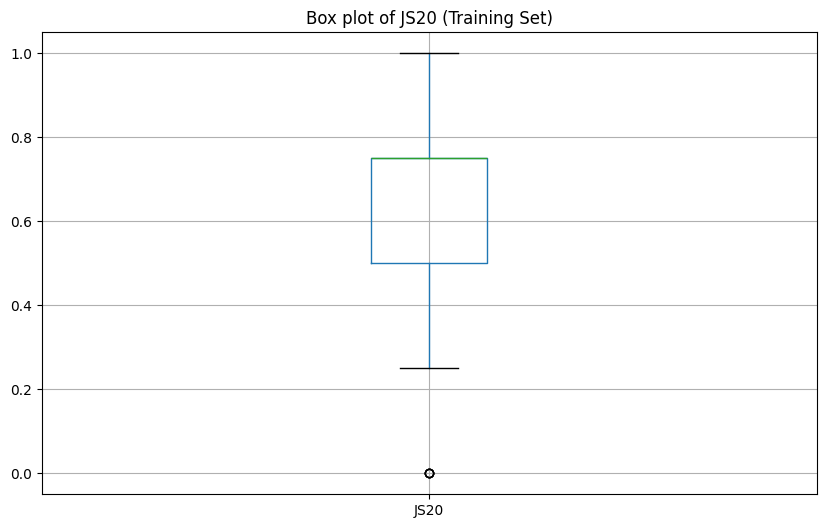

JS21 - Number of Outliers: 0


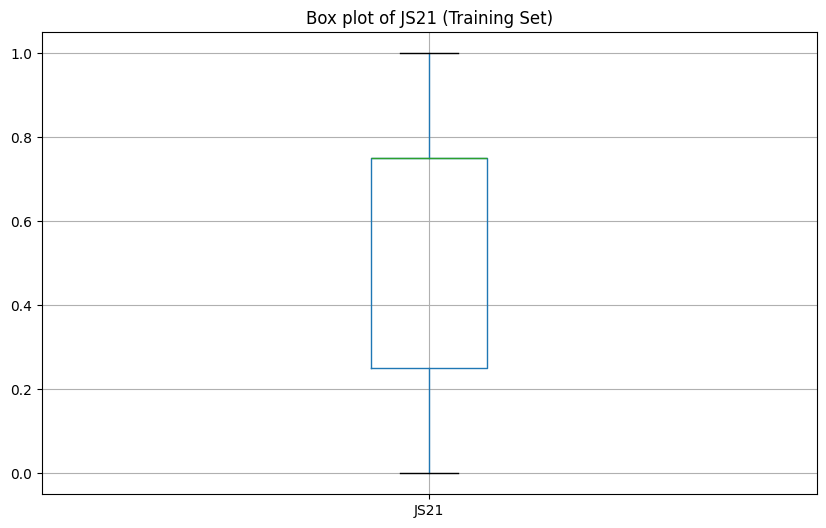

JS22 - Number of Outliers: 0


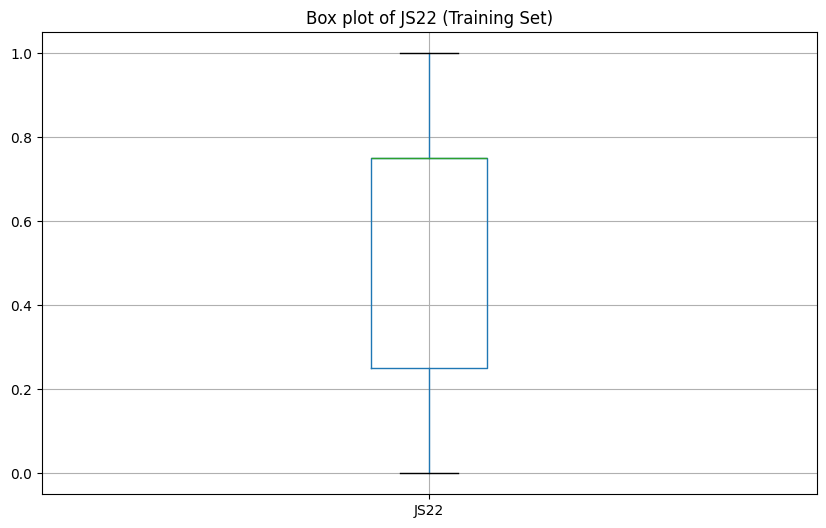

JS23 - Number of Outliers: 0


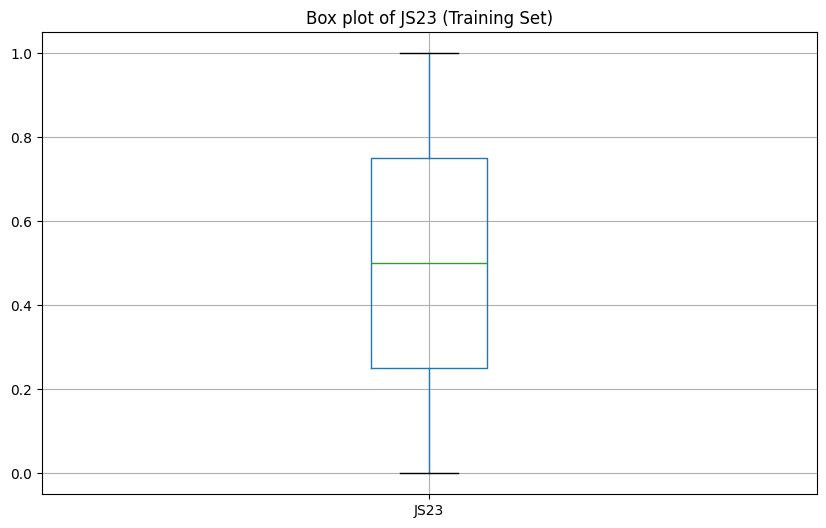

JS24 - Number of Outliers: 0


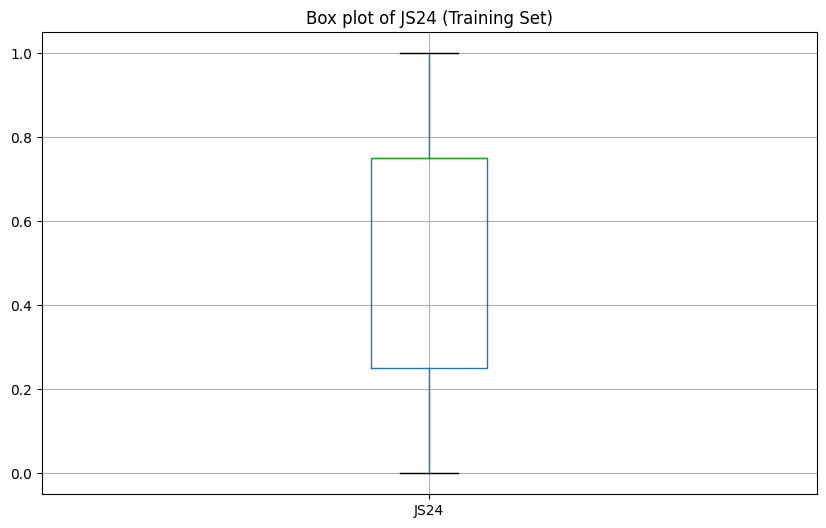

JS25 - Number of Outliers: 8


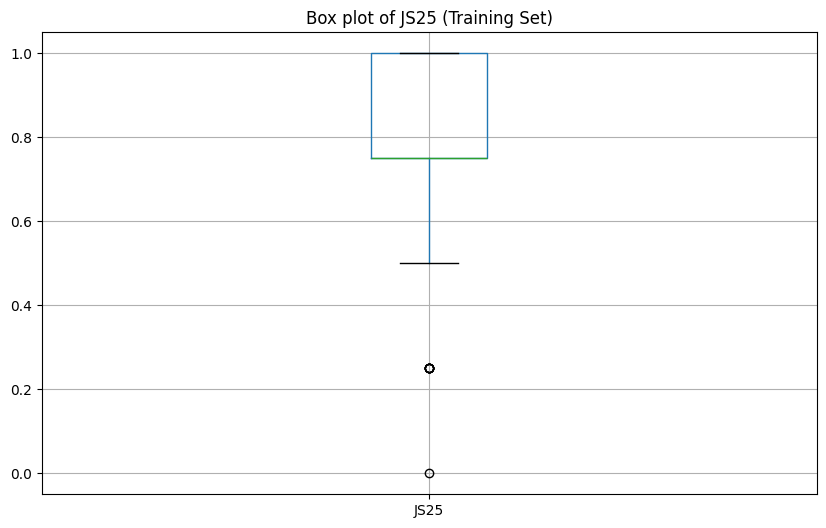

JS26 - Number of Outliers: 8


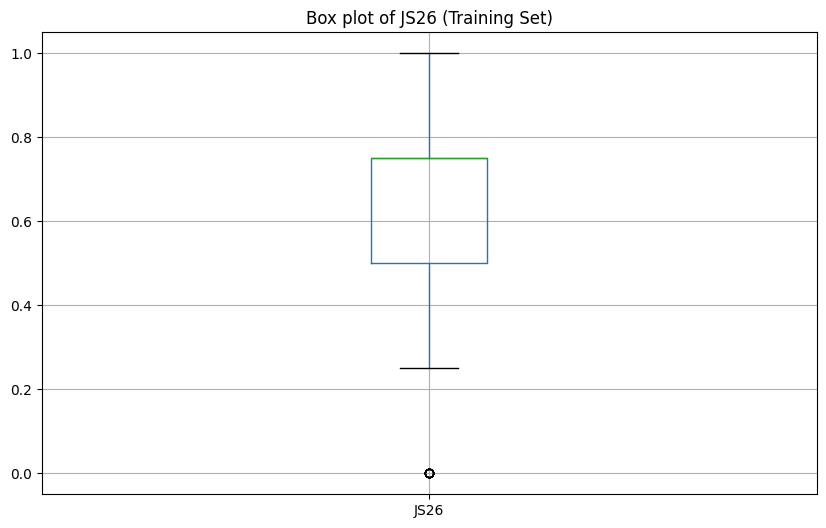

JS27 - Number of Outliers: 92


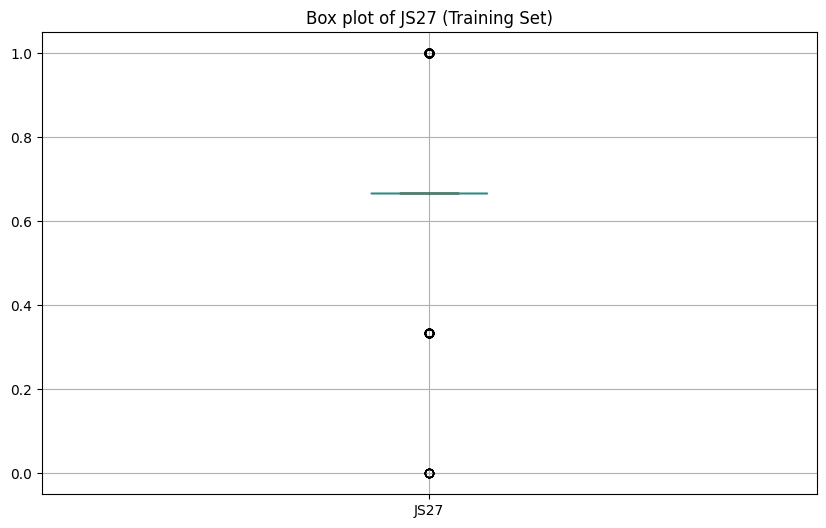

JS28 - Number of Outliers: 30


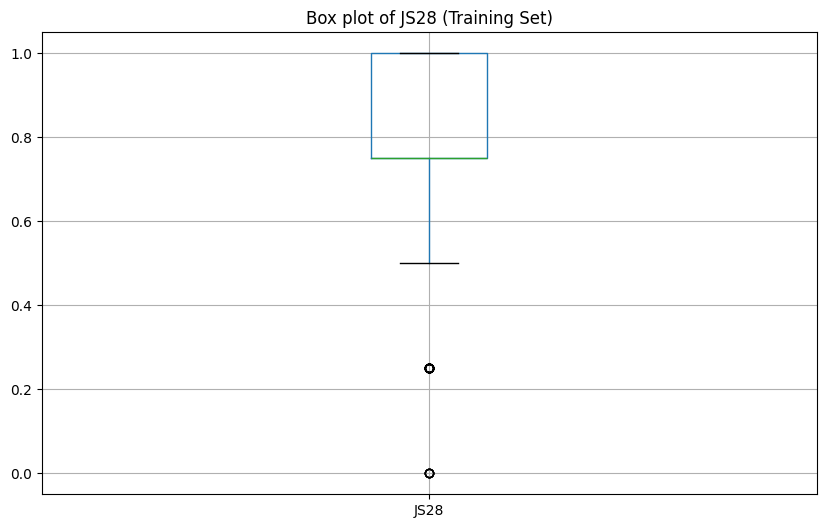

JS29 - Number of Outliers: 28


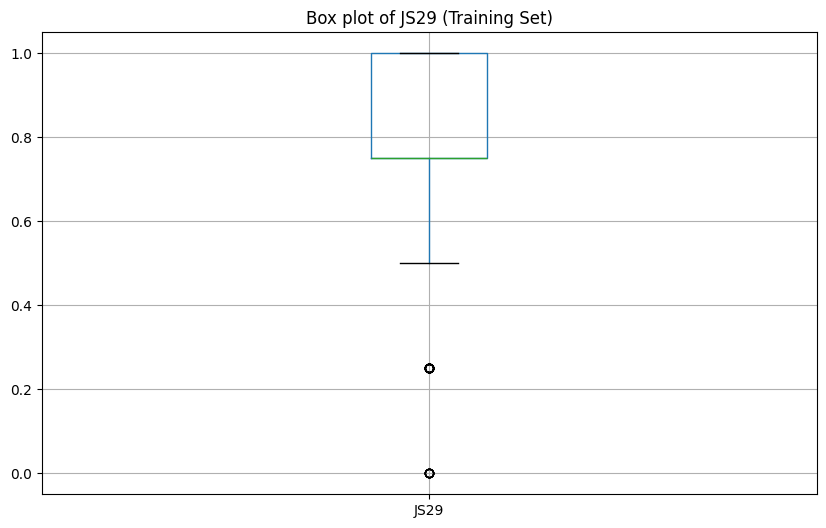

JS30 - Number of Outliers: 5


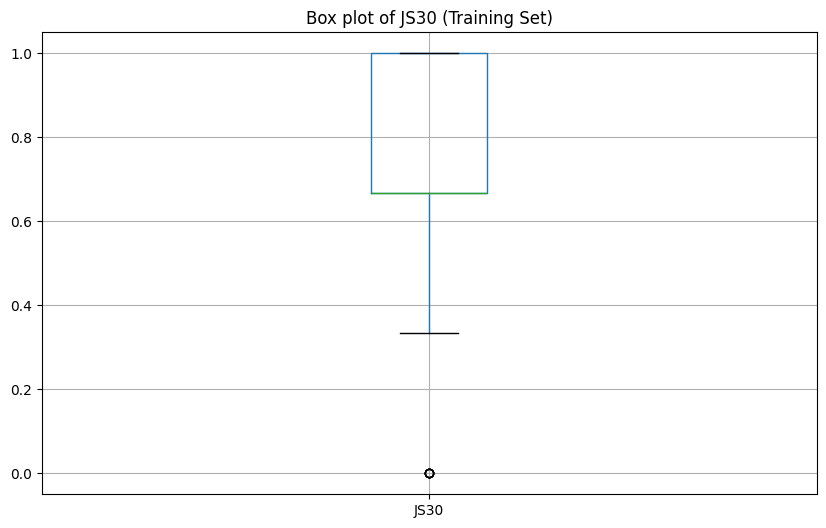

JS31 - Number of Outliers: 5


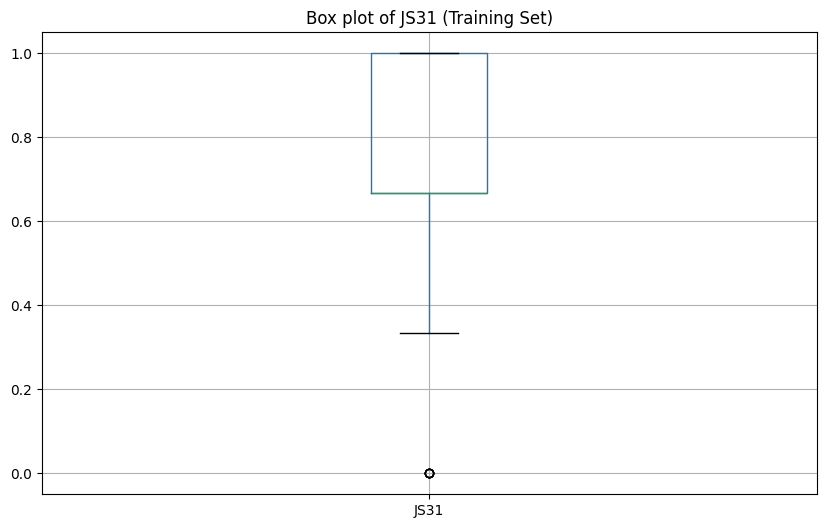

JS32 - Number of Outliers: 11


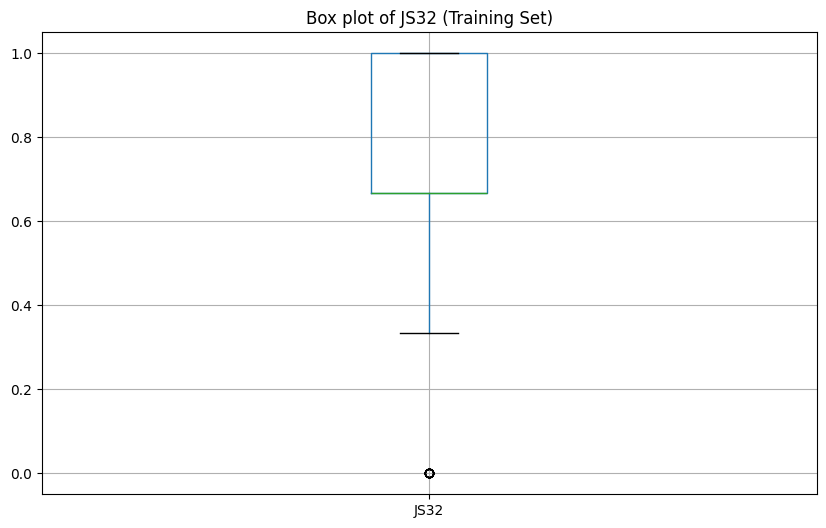

JS33 - Number of Outliers: 48


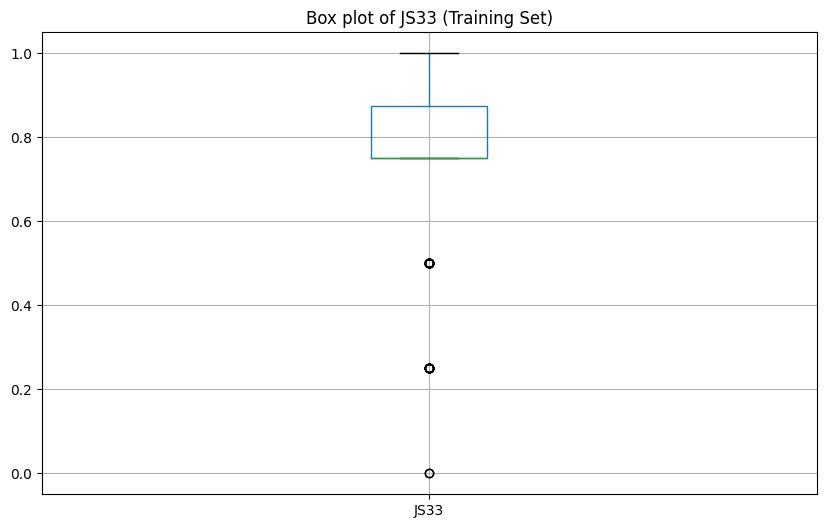

JS34 - Number of Outliers: 24


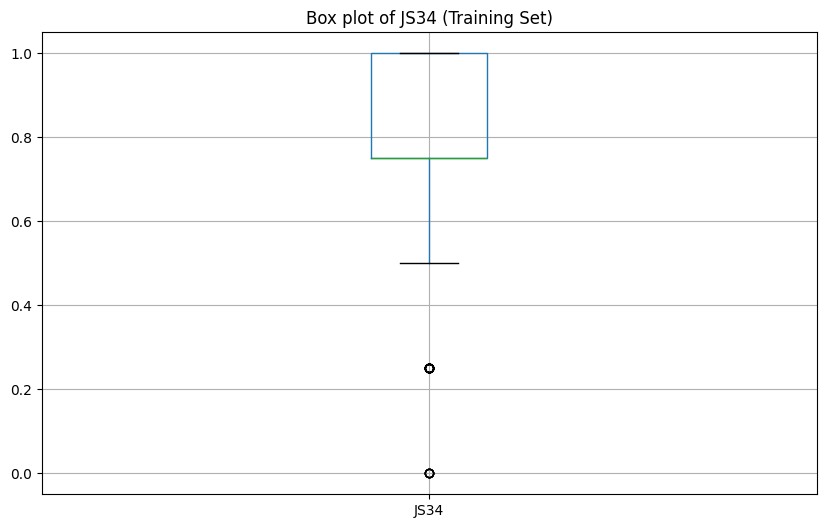

JS35 - Number of Outliers: 4


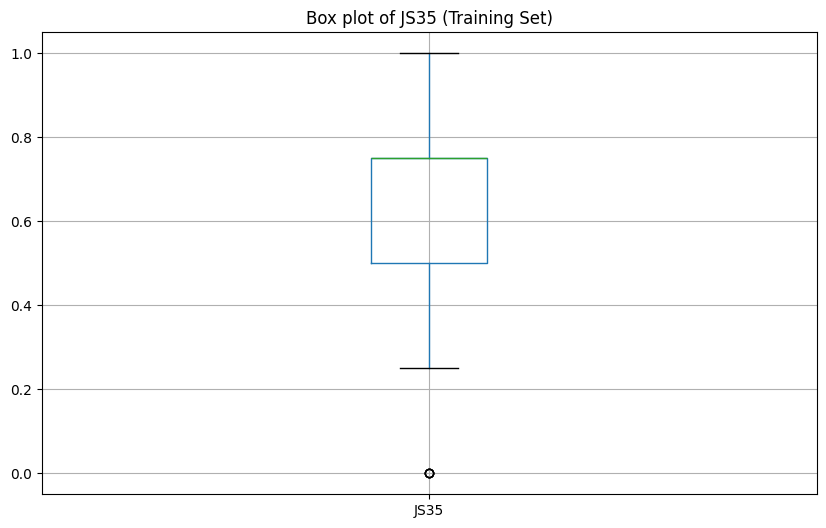

JS36 - Number of Outliers: 5


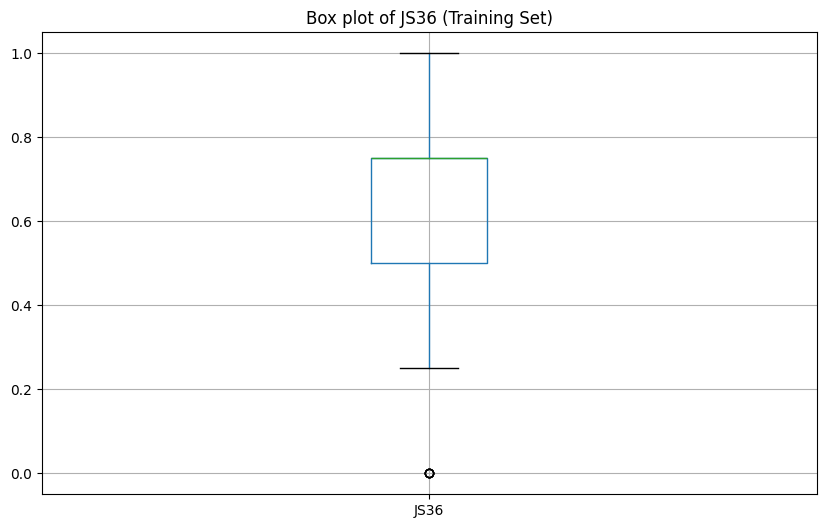

JP1 - Number of Outliers: 7


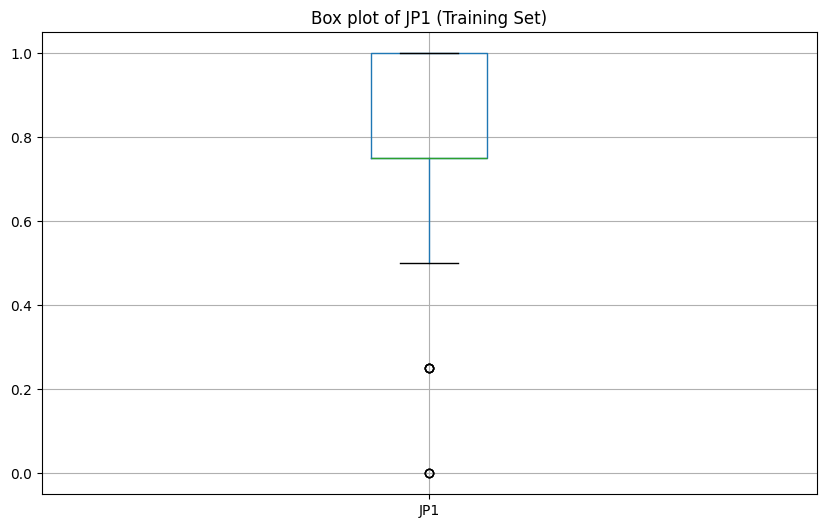

JP2 - Number of Outliers: 6


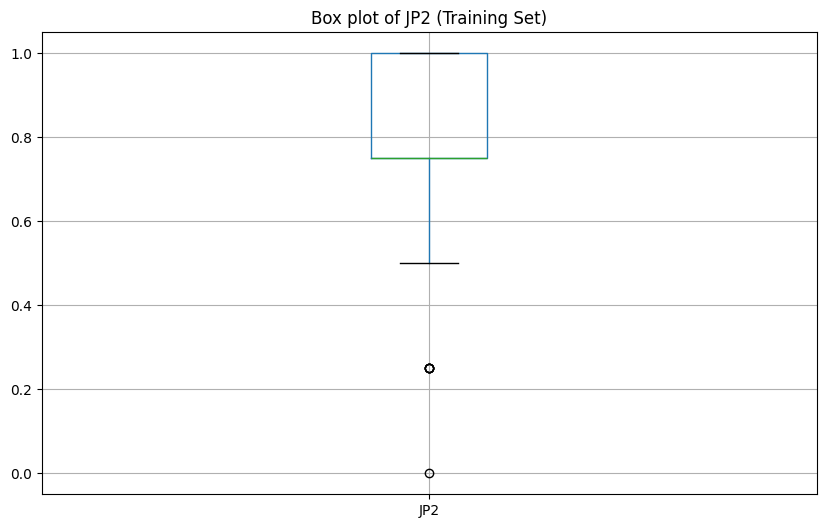

JP3 - Number of Outliers: 16


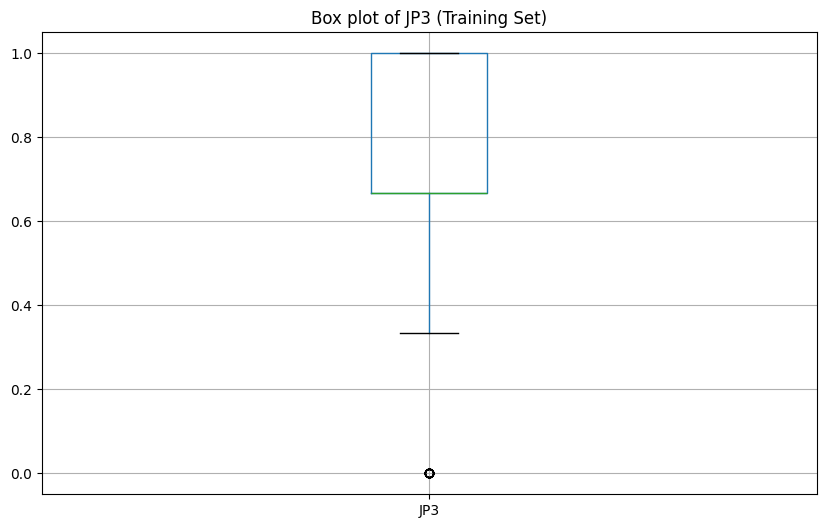

JP4 - Number of Outliers: 25


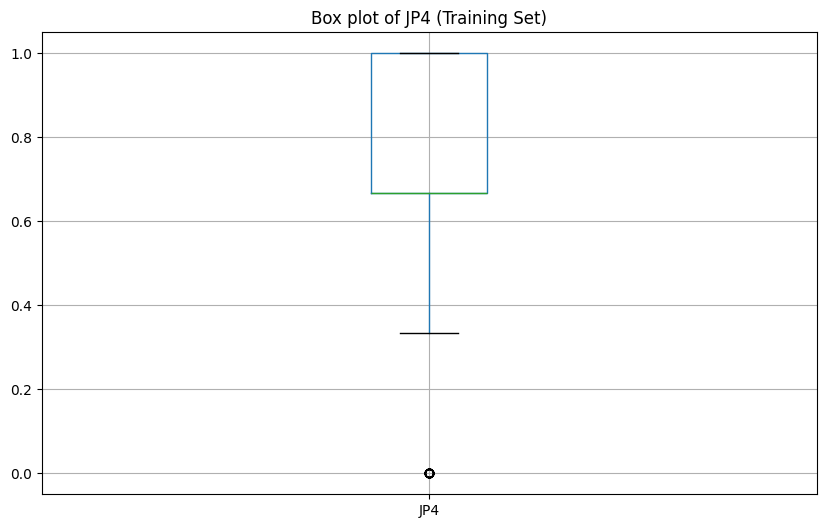

JP5 - Number of Outliers: 12


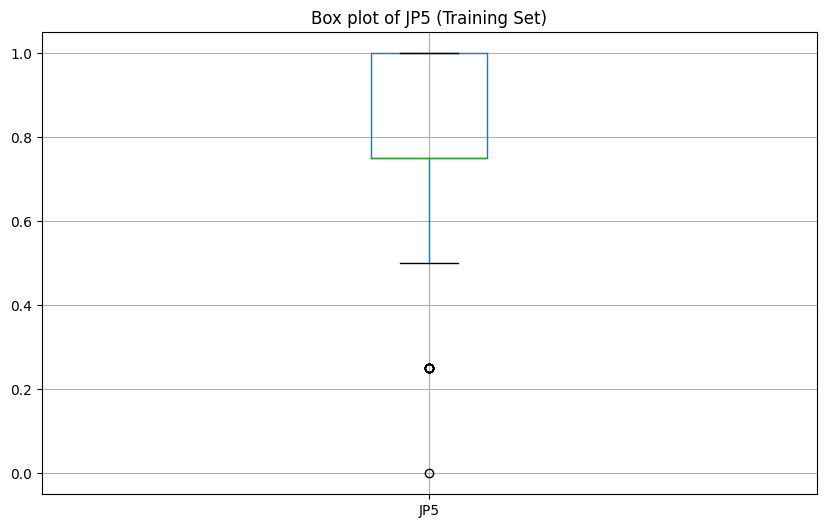

JP6 - Number of Outliers: 3


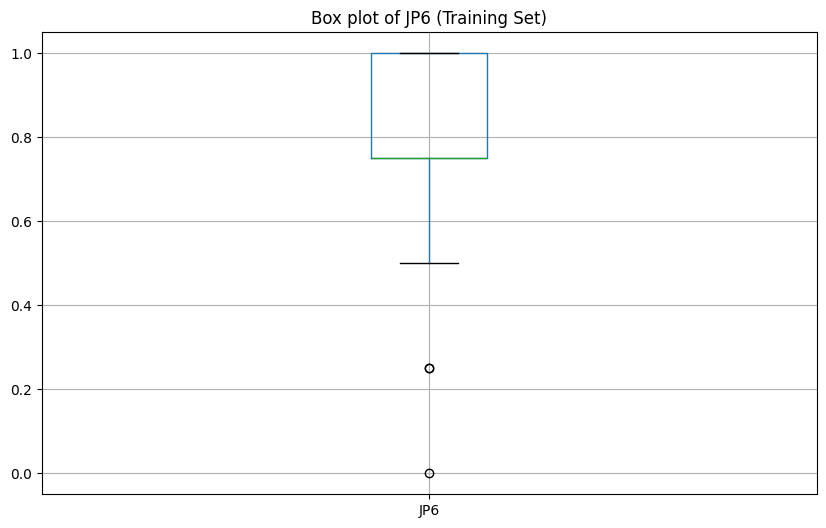

In [ ]:
# Step 2: Detect and handle outliers in the training set
for column in X_train.columns:
    # Calculate IQR
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = X_train[(X_train[column] < lower_bound) | (X_train[column] > upper_bound)]
    print(f"{column} - Number of Outliers: {len(outliers)}")

    # Visualize outliers with a box plot
    plt.figure(figsize=(10, 6))
    X_train.boxplot([column])
    plt.title(f"Box plot of {column} (Training Set)")
    plt.show()

    # Replace outliers with the column mean (excluding outliers)
    mean_value = X_train[(X_train[column] >= lower_bound) & (X_train[column] <= upper_bound)][column].mean()
    X_train.loc[(X_train[column] < lower_bound) | (X_train[column] > upper_bound), column] = mean_value


#Feature Selection

# ANOVA + RFECV

In [ ]:

# Combine and deduplicate feature names
combined_features = [
    "JS36", "JS23", "JS35", "Household income", "JS33", "JS21", "JS17", "JS11", "JS24",
    "JS26", "JP4", "Sperm quality", "JS5", "JS6", "JS15", "JS4", "JS7", "Educational level",
    "JS20", "JS14", "JS22", "JS29", "JS10", "JS12", "JS2", "JS28", "JS18", "JS25", "JS8",
    "JS31", "JS30", "JP6", "JS3", "JS32", "JS16", "JS13", "JS19", "JS1", "JP5"
]

print("Total number of unique features:", len(combined_features))
print("List of unique features:", combined_features)


# Filter X_train and X_test to keep only these features
X_train_selected = X_train[combined_features]
X_test_selected = X_test[combined_features]

print(f"Shape of X_train after selection: {X_train_selected.shape}")
print(f"Shape of X_test after selection: {X_test_selected.shape}")


Total number of unique features: 39
List of unique features: ['JS36', 'JS23', 'JS35', 'Household income', 'JS33', 'JS21', 'JS17', 'JS11', 'JS24', 'JS26', 'JP4', 'Sperm quality', 'JS5', 'JS6', 'JS15', 'JS4', 'JS7', 'Educational level', 'JS20', 'JS14', 'JS22', 'JS29', 'JS10', 'JS12', 'JS2', 'JS28', 'JS18', 'JS25', 'JS8', 'JS31', 'JS30', 'JP6', 'JS3', 'JS32', 'JS16', 'JS13', 'JS19', 'JS1', 'JP5']
Shape of X_train after selection: (247, 39)
Shape of X_test after selection: (62, 39)


In [ ]:
X_train = X_train_selected
X_test = X_test_selected

In [ ]:
X_train.shape

(247, 39)

# Synthetic Data

In [ ]:
! pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.3/152.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.5/170.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 7.1 MB/s eta 0:00:00


In [ ]:
! pip install copulas

In [ ]:
!pip install ctgan

In [ ]:
# Import the necessary modules
from sdv.single_table import CTGANSynthesizer
import pandas as pd
from sdv.metadata import Metadata

def synthesize_data(X_train, X_test, y_train, y_test):
    # Ensure y_train is a pandas Series
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    # Ensure y_train has a name
    if y_train.name is None:
        y_train.name = "target"

    # Ensure X_train is a pandas DataFrame
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)

    # Combine X_train and y_train into a single dataframe
    train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

    metadata = Metadata.detect_from_dataframe(
    data=train_data,
    table_name='stress')

    # Initialize the CTGAN synthesizer
    synthesizer = CTGANSynthesizer(
    metadata, # required
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

    # Fit the synthesizer on the training data
    synthesizer.fit(train_data)

    # Generate synthetic data
    num_samples = 1000  # Generate same number of synthetic samples as original training data
    synthetic_data = synthesizer.sample(num_samples)

    # Split synthetic_data back into X_synthesized and y_synthesized
    X_synthesized = synthetic_data.drop(columns=[y_train.name])
    y_synthesized = synthetic_data[y_train.name]

    return X_synthesized, y_synthesized


# Assuming X_train, X_test, y_train, y_test are already defined
# Generate synthetic data
X_synthesized, y_synthesized = synthesize_data(X_train, X_test, y_train, y_test)

Gen. (-0.85) | Discrim. (-0.40): 100%|██████████| 500/500 [01:21<00:00,  6.13it/s]


In [ ]:
X_synthesized.shape

(1000, 39)

In [ ]:
y_synthesized

0      0
1      1
2      1
3      1
4      0
      ..
995    0
996    0
997    0
998    1
999    1
Name: Occupational_Stress_Target, Length: 1000, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from ctgan import CTGAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

from copulas.multivariate import GaussianMultivariate

def evaluate_model(model, X_train, X_test, y_train, y_test, X_synthetic, y_synthetic):
    """
    Evaluate model performance on original and synthetic data
    """
    # Train on original data, test on original test set
    model.fit(X_train, y_train)
    y_pred_original = model.predict(X_test)
    original_accuracy = accuracy_score(y_test, y_pred_original)

    print("\nModel Performance on Original Test Data:")
    print("----------------------------------------")
    print(f"Accuracy: {original_accuracy:.4f}")
    print("\nClassification Report on Original Test Data:")
    print(classification_report(y_test, y_pred_original, digits = 4))


    # Train on synthetic data, test on original test set
    model_synthetic = model.__class__(**model.get_params())
    model_synthetic.fit(X_synthetic, y_synthetic)
    y_pred_synthetic = model_synthetic.predict(X_test)
    synthetic_accuracy = accuracy_score(y_test, y_pred_synthetic)

    print("\nModel Performance when Trained on Synthetic Data:")
    print("-----------------------------------------------")
    print(f"Accuracy: {synthetic_accuracy:.4f}")
    print("\nClassification Report when Trained on Synthetic Data:")
    print(classification_report(y_test, y_pred_synthetic, digits = 4))

    return original_accuracy, synthetic_accuracy

# Model Selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# import numpy as np



# Hyperparameter Optimization - Randomized Search CV

In [ ]:
# Define model hyperparameter spaces
param_distributions = {
    'GaussianNB': {},  # Naive Bayes doesn't have relevant hyperparameters for tuning in this context
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'LGBMClassifier': {
        'num_leaves': [31, 62, 127],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [100, 200, 300]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 6, 9]
    },
    'LinearRegression': {},  # Linear Regression typically does not need hyperparameter tuning for most cases
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Instantiate models
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LinearRegression': LinearRegression(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

best_params = {}

for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}")
    clf = RandomizedSearchCV(model, param_distributions[model_name], n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_params[model_name] = clf.best_params_
    print(f"Best parameters for {model_name}: {clf.best_params_}")

Running RandomizedSearchCV for GaussianNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for GaussianNB: {}
Running RandomizedSearchCV for DecisionTreeClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for DecisionTreeClassifier: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Running RandomizedSearchCV for RandomForestClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Running RandomizedSearchCV for AdaBoostClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for AdaBoostClassifier: {'n_estimators': 50, 'learning_rate': 0.1}
Running RandomizedSearchCV for LGBMClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [

# Model Training and Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():

    if model_name == 'LinearRegression':
      continue
    print(model_name)

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    evaluate_model(optimized_model, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

GaussianNB

Model Performance on Original Test Data:
----------------------------------------
Accuracy: 0.7097

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.6087    0.6087    0.6087        23
           1     0.7692    0.7692    0.7692        39

    accuracy                         0.7097        62
   macro avg     0.6890    0.6890    0.6890        62
weighted avg     0.7097    0.7097    0.7097        62


Model Performance when Trained on Synthetic Data:
-----------------------------------------------
Accuracy: 0.6613

Classification Report when Trained on Synthetic Data:
              precision    recall  f1-score   support

           0     0.5500    0.4783    0.5116        23
           1     0.7143    0.7692    0.7407        39

    accuracy                         0.6613        62
   macro avg     0.6321    0.6237    0.6262        62
weighted avg     0.6533    0.6613    0.6557        62

DecisionTreeClassi

# Ensemble Model Creation (Later)

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9474    0.7826    0.8571        23
           1     0.8837    0.9744    0.9268        39

    accuracy                         0.9032        62
   macro avg     0.9155    0.8785    0.8920        62
weighted avg     0.9073    0.9032    0.9010        62



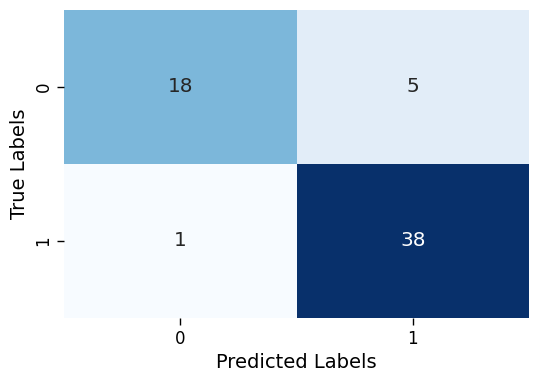

ROC-AUC Score for Hard Voting: 0.8785


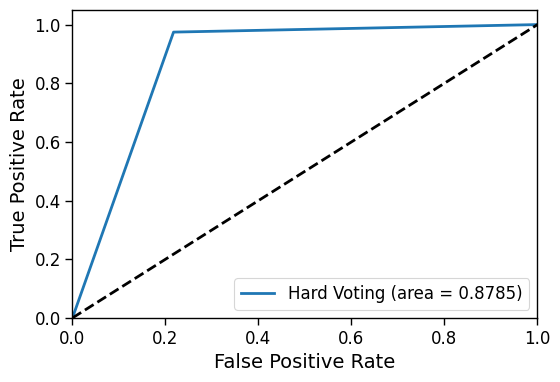


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



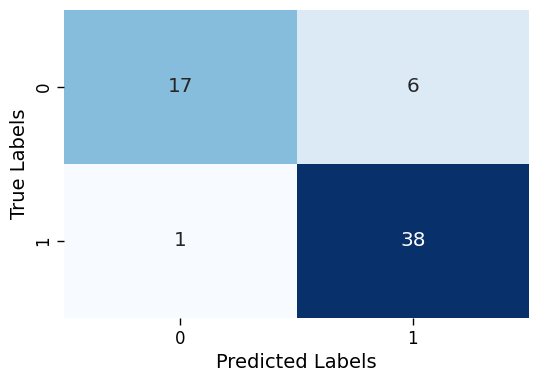

ROC-AUC Score for Soft Voting: 0.8685


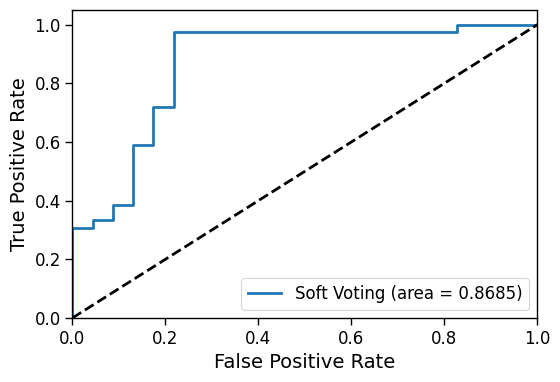

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.6207    0.7826    0.6923        23
           1     0.8485    0.7179    0.7778        39

    accuracy                         0.7419        62
   macro avg     0.7346    0.7503    0.7350        62
weighted avg     0.7640    0.7419    0.7461        62



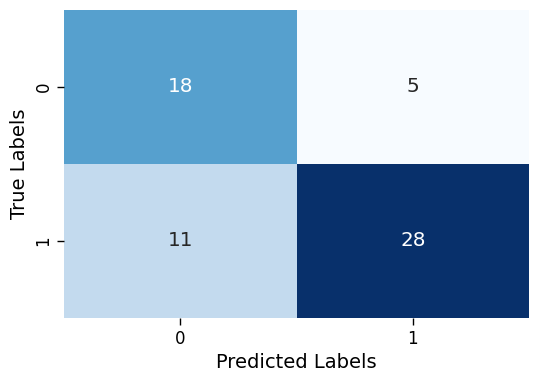

ROC-AUC Score for Hard Voting: 0.7503


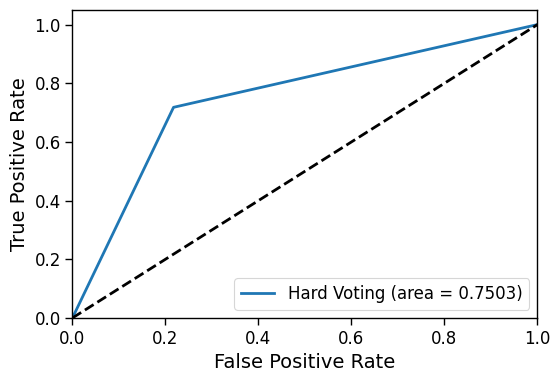


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.6667    0.7826    0.7200        23
           1     0.8571    0.7692    0.8108        39

    accuracy                         0.7742        62
   macro avg     0.7619    0.7759    0.7654        62
weighted avg     0.7865    0.7742    0.7771        62



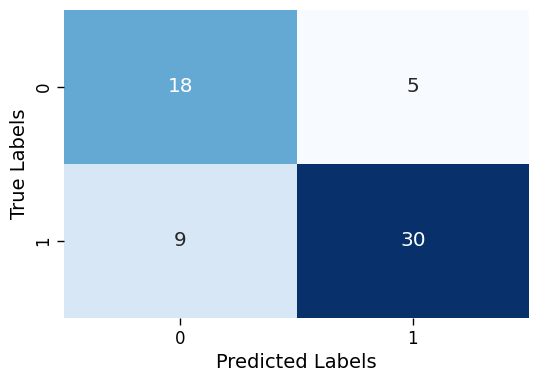

ROC-AUC Score for Soft Voting: 0.8227


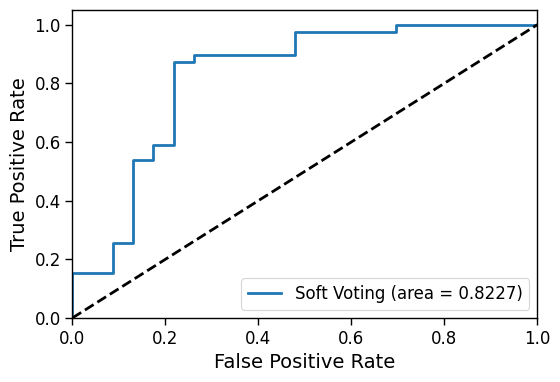

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_synthesized, y_synthesized)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_synthesized, y_synthesized)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [ ]:
# Import the necessary modules
from sdv.single_table import GaussianCopulaSynthesizer
import pandas as pd
from sdv.metadata import Metadata

def synthesize_data(X_train, X_test, y_train, y_test):
    # Ensure y_train is a pandas Series
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    # Ensure y_train has a name
    if y_train.name is None:
        y_train.name = "target"

    # Ensure X_train is a pandas DataFrame
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)

    # Combine X_train and y_train into a single dataframe
    train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

    metadata = Metadata.detect_from_dataframe(
    data=train_data,
    table_name='stress')

    # Initialize the CTGAN synthesizer
    synthesizer = GaussianCopulaSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False
)

    # Fit the synthesizer on the training data
    synthesizer.fit(train_data)

    # Generate synthetic data
    num_samples = 1000  # Generate same number of synthetic samples as original training data
    synthetic_data = synthesizer.sample(num_samples)

    # Split synthetic_data back into X_synthesized and y_synthesized
    X_synthesized = synthetic_data.drop(columns=[y_train.name])
    y_synthesized = synthetic_data[y_train.name]

    return X_synthesized, y_synthesized


# Assuming X_train, X_test, y_train, y_test are already defined
# Generate synthetic data
X_synthesized, y_synthesized = synthesize_data(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():

    if model_name == 'LinearRegression':
      continue
    print(model_name)

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    evaluate_model(optimized_model, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

GaussianNB

Model Performance on Original Test Data:
----------------------------------------
Accuracy: 0.7097

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.6087    0.6087    0.6087        23
           1     0.7692    0.7692    0.7692        39

    accuracy                         0.7097        62
   macro avg     0.6890    0.6890    0.6890        62
weighted avg     0.7097    0.7097    0.7097        62


Model Performance when Trained on Synthetic Data:
-----------------------------------------------
Accuracy: 0.3387

Classification Report when Trained on Synthetic Data:
              precision    recall  f1-score   support

           0     0.3269    0.7391    0.4533        23
           1     0.4000    0.1026    0.1633        39

    accuracy                         0.3387        62
   macro avg     0.3635    0.4208    0.3083        62
weighted avg     0.3729    0.3387    0.2709        62

DecisionTreeClassi

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9474    0.7826    0.8571        23
           1     0.8837    0.9744    0.9268        39

    accuracy                         0.9032        62
   macro avg     0.9155    0.8785    0.8920        62
weighted avg     0.9073    0.9032    0.9010        62



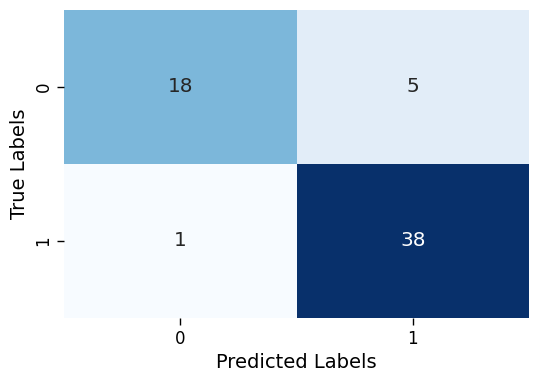

ROC-AUC Score for Hard Voting: 0.8785


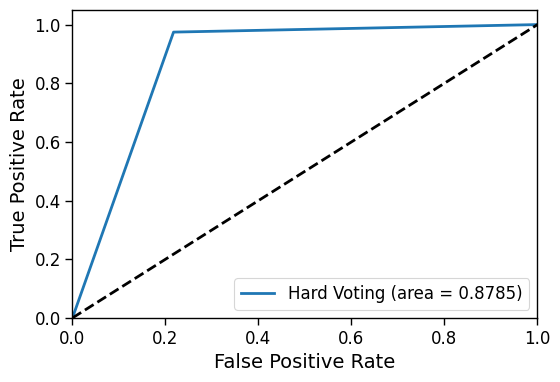


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



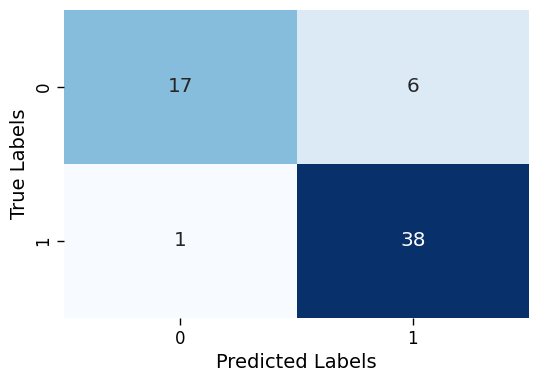

ROC-AUC Score for Soft Voting: 0.8673


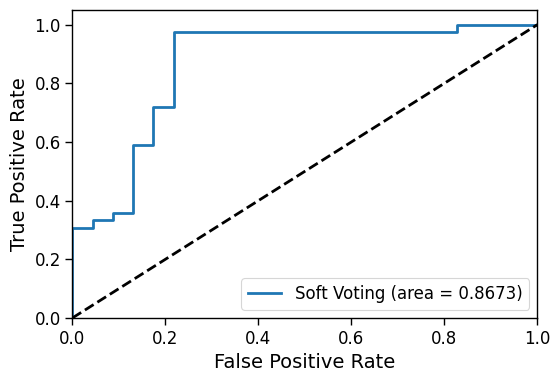

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.8889    0.6957    0.7805        23
           1     0.8409    0.9487    0.8916        39

    accuracy                         0.8548        62
   macro avg     0.8649    0.8222    0.8360        62
weighted avg     0.8587    0.8548    0.8504        62



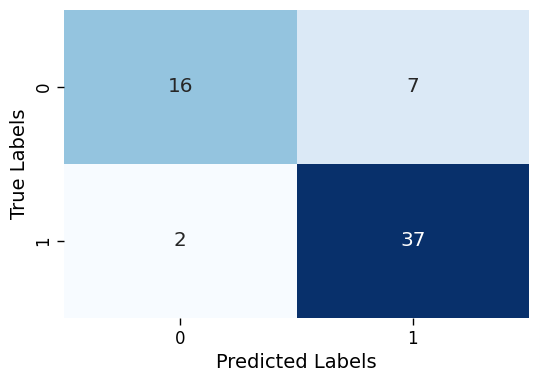

ROC-AUC Score for Hard Voting: 0.8222


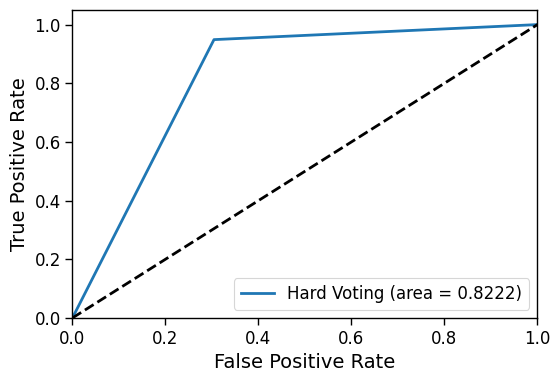


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.8421    0.6957    0.7619        23
           1     0.8372    0.9231    0.8780        39

    accuracy                         0.8387        62
   macro avg     0.8397    0.8094    0.8200        62
weighted avg     0.8390    0.8387    0.8350        62



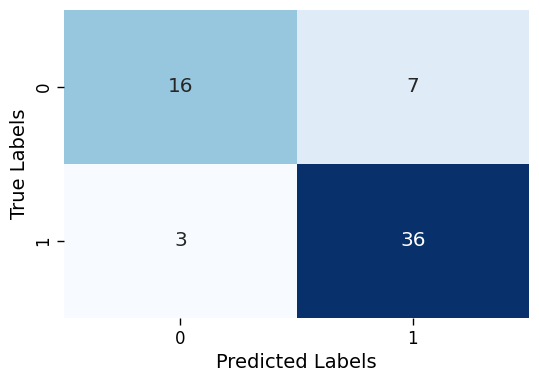

ROC-AUC Score for Soft Voting: 0.8718


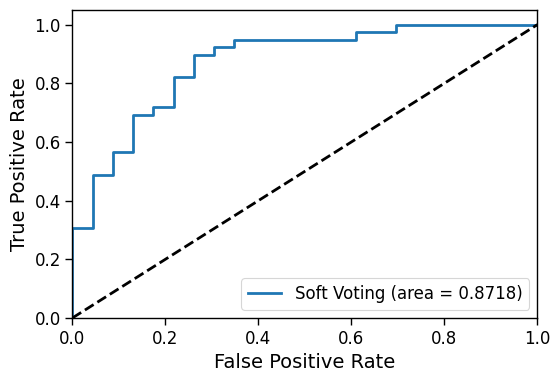

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_synthesized, y_synthesized)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_synthesized, y_synthesized)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [ ]:
# Import the necessary modules
from sdv.single_table import TVAESynthesizer
import pandas as pd
from sdv.metadata import Metadata

def synthesize_data(X_train, X_test, y_train, y_test):
    # Ensure y_train is a pandas Series
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    # Ensure y_train has a name
    if y_train.name is None:
        y_train.name = "target"

    # Ensure X_train is a pandas DataFrame
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)

    # Combine X_train and y_train into a single dataframe
    train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

    metadata = Metadata.detect_from_dataframe(
    data=train_data,
    table_name='stress')

    # Initialize the CTGAN synthesizer
    synthesizer = TVAESynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

    # Fit the synthesizer on the training data
    synthesizer.fit(train_data)

    # Generate synthetic data
    num_samples = 1000  # Generate same number of synthetic samples as original training data
    synthetic_data = synthesizer.sample(num_samples)

    # Split synthetic_data back into X_synthesized and y_synthesized
    X_synthesized = synthetic_data.drop(columns=[y_train.name])
    y_synthesized = synthetic_data[y_train.name]

    return X_synthesized, y_synthesized


# Assuming X_train, X_test, y_train, y_test are already defined
# Generate synthetic data
X_synthesized, y_synthesized = synthesize_data(X_train, X_test, y_train, y_test)

Loss: -129.265: 100%|██████████| 500/500 [00:22<00:00, 22.13it/s]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():

    if model_name == 'LinearRegression':
      continue
    print(model_name)

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    evaluate_model(optimized_model, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

GaussianNB

Model Performance on Original Test Data:
----------------------------------------
Accuracy: 0.7097

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.6087    0.6087    0.6087        23
           1     0.7692    0.7692    0.7692        39

    accuracy                         0.7097        62
   macro avg     0.6890    0.6890    0.6890        62
weighted avg     0.7097    0.7097    0.7097        62


Model Performance when Trained on Synthetic Data:
-----------------------------------------------
Accuracy: 0.5806

Classification Report when Trained on Synthetic Data:
              precision    recall  f1-score   support

           0     0.2000    0.0435    0.0714        23
           1     0.6140    0.8974    0.7292        39

    accuracy                         0.5806        62
   macro avg     0.4070    0.4705    0.4003        62
weighted avg     0.4604    0.5806    0.4852        62

DecisionTreeClassi

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9474    0.7826    0.8571        23
           1     0.8837    0.9744    0.9268        39

    accuracy                         0.9032        62
   macro avg     0.9155    0.8785    0.8920        62
weighted avg     0.9073    0.9032    0.9010        62



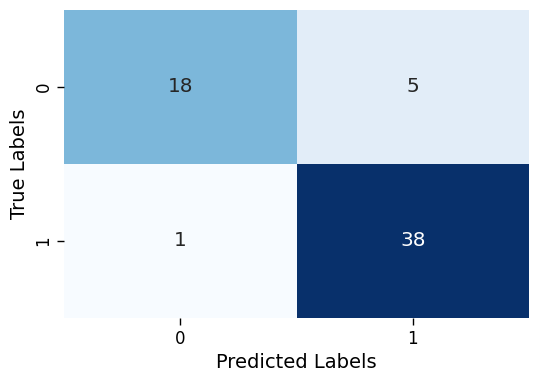

ROC-AUC Score for Hard Voting: 0.8785


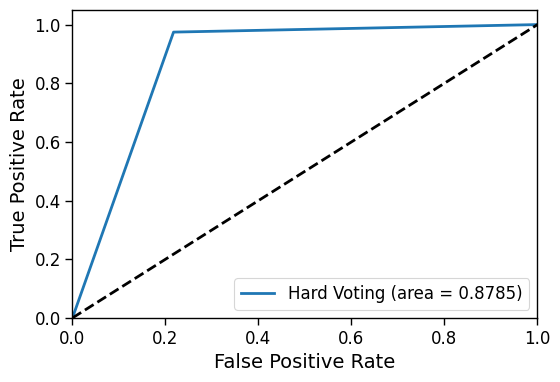


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



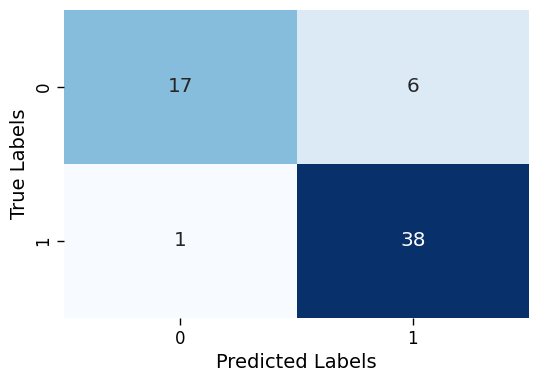

ROC-AUC Score for Soft Voting: 0.8673


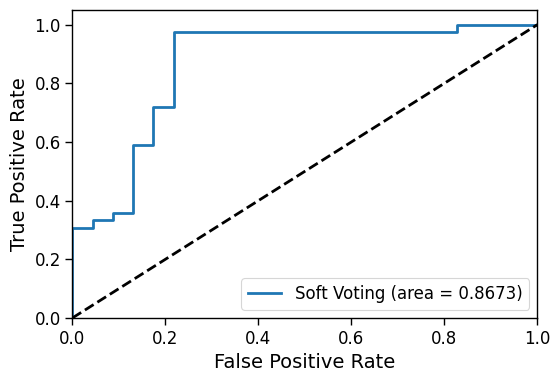

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.6400    0.6957    0.6667        23
           1     0.8108    0.7692    0.7895        39

    accuracy                         0.7419        62
   macro avg     0.7254    0.7324    0.7281        62
weighted avg     0.7474    0.7419    0.7439        62



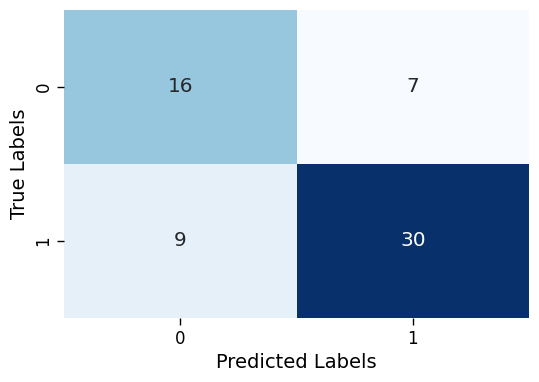

ROC-AUC Score for Hard Voting: 0.7324


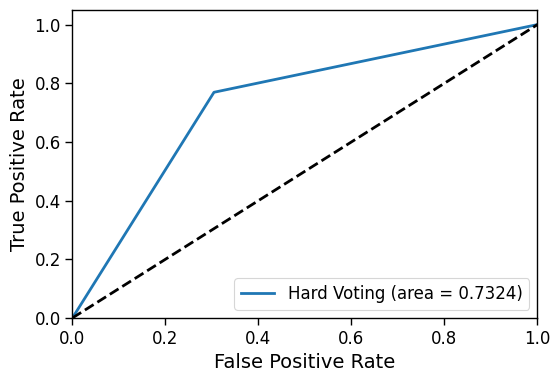


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.5926    0.6957    0.6400        23
           1     0.8000    0.7179    0.7568        39

    accuracy                         0.7097        62
   macro avg     0.6963    0.7068    0.6984        62
weighted avg     0.7231    0.7097    0.7134        62



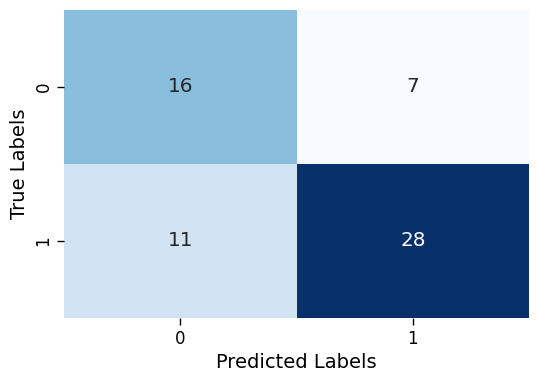

ROC-AUC Score for Soft Voting: 0.8339


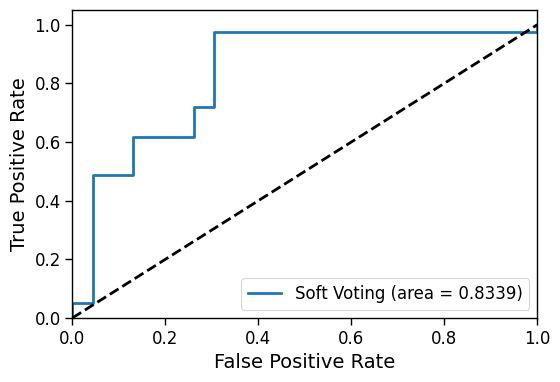

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_synthesized, y_synthesized)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_synthesized, y_synthesized)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [ ]:
# Import the necessary modules
from sdv.single_table import CopulaGANSynthesizer
import pandas as pd
from sdv.metadata import Metadata

def synthesize_data(X_train, X_test, y_train, y_test):
    # Ensure y_train is a pandas Series
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    # Ensure y_train has a name
    if y_train.name is None:
        y_train.name = "target"

    # Ensure X_train is a pandas DataFrame
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)

    # Combine X_train and y_train into a single dataframe
    train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

    metadata = Metadata.detect_from_dataframe(
    data=train_data,
    table_name='stress')

    # Initialize the CTGAN synthesizer
    synthesizer = CopulaGANSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

    # Fit the synthesizer on the training data
    synthesizer.fit(train_data)

    # Generate synthetic data
    num_samples = 1000  # Generate same number of synthetic samples as original training data
    synthetic_data = synthesizer.sample(num_samples)

    # Split synthetic_data back into X_synthesized and y_synthesized
    X_synthesized = synthetic_data.drop(columns=[y_train.name])
    y_synthesized = synthetic_data[y_train.name]

    return X_synthesized, y_synthesized


# Assuming X_train, X_test, y_train, y_test are already defined
# Generate synthetic data
X_synthesized, y_synthesized = synthesize_data(X_train, X_test, y_train, y_test)

Gen. (-1.32) | Discrim. (-0.70): 100%|██████████| 500/500 [01:11<00:00,  7.01it/s]


In [ ]:
# Assuming X_train is your DataFrame
null_rows = X_synthesized.isnull().any(axis=1)
num_null_rows = null_rows.sum()

print(f"Number of rows containing null values: {num_null_rows}")

Number of rows containing null values: 7


In [ ]:
X_synthesized = X_synthesized[~null_rows]
y_synthesized = y_synthesized[~null_rows]

In [ ]:
# Assuming X_train is your DataFrame
null_rows = X_synthesized.isnull().any(axis=1)
num_null_rows = null_rows.sum()

print(f"Number of rows containing null values: {num_null_rows}")

Number of rows containing null values: 0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():

    if model_name == 'LinearRegression':
      continue
    print(model_name)

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    evaluate_model(optimized_model, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

GaussianNB

Model Performance on Original Test Data:
----------------------------------------
Accuracy: 0.7097

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.6087    0.6087    0.6087        23
           1     0.7692    0.7692    0.7692        39

    accuracy                         0.7097        62
   macro avg     0.6890    0.6890    0.6890        62
weighted avg     0.7097    0.7097    0.7097        62


Model Performance when Trained on Synthetic Data:
-----------------------------------------------
Accuracy: 0.6452

Classification Report when Trained on Synthetic Data:
              precision    recall  f1-score   support

           0     0.5333    0.3478    0.4211        23
           1     0.6809    0.8205    0.7442        39

    accuracy                         0.6452        62
   macro avg     0.6071    0.5842    0.5826        62
weighted avg     0.6261    0.6452    0.6243        62

DecisionTreeClassi

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9474    0.7826    0.8571        23
           1     0.8837    0.9744    0.9268        39

    accuracy                         0.9032        62
   macro avg     0.9155    0.8785    0.8920        62
weighted avg     0.9073    0.9032    0.9010        62



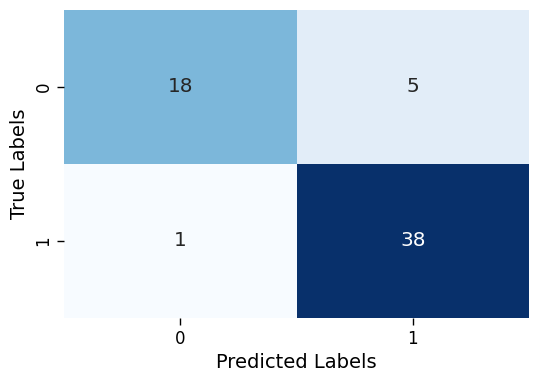

ROC-AUC Score for Hard Voting: 0.8785


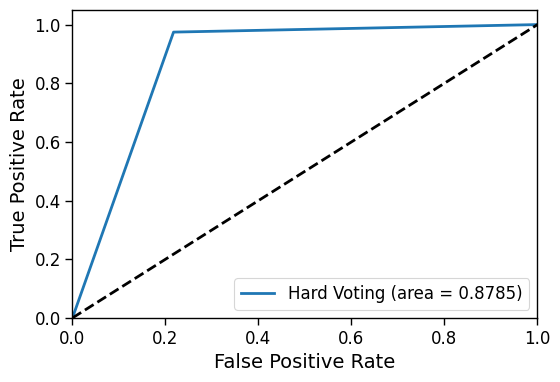


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



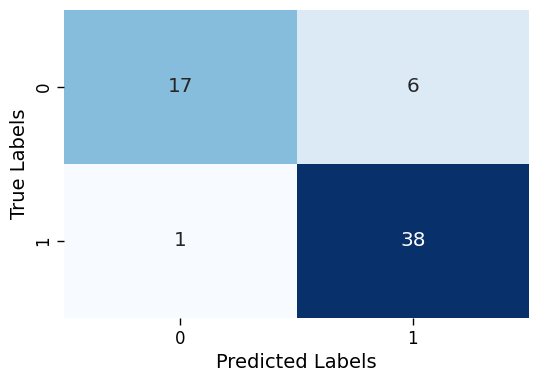

ROC-AUC Score for Soft Voting: 0.8673


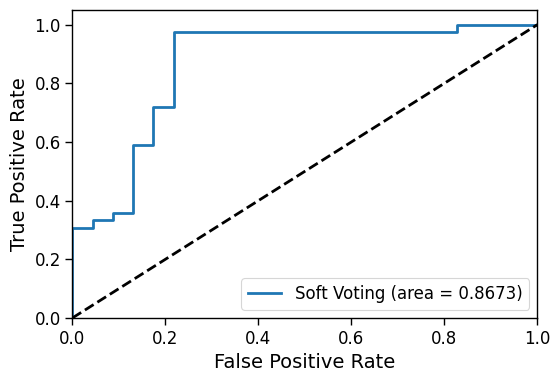

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.6522    0.6522    0.6522        23
           1     0.7949    0.7949    0.7949        39

    accuracy                         0.7419        62
   macro avg     0.7235    0.7235    0.7235        62
weighted avg     0.7419    0.7419    0.7419        62



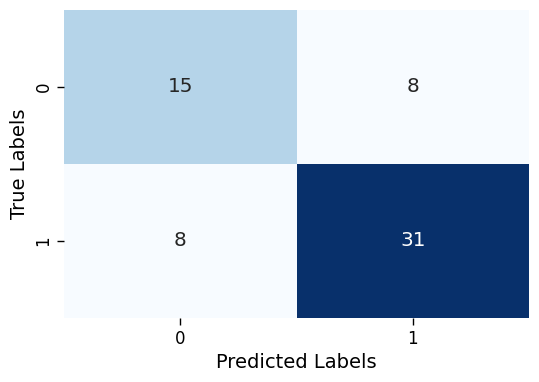

ROC-AUC Score for Hard Voting: 0.7235


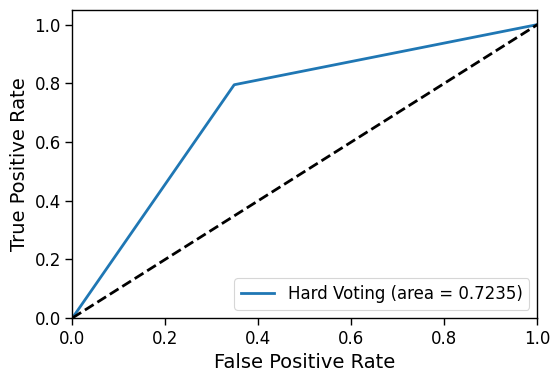


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.6364    0.6087    0.6222        23
           1     0.7750    0.7949    0.7848        39

    accuracy                         0.7258        62
   macro avg     0.7057    0.7018    0.7035        62
weighted avg     0.7236    0.7258    0.7245        62



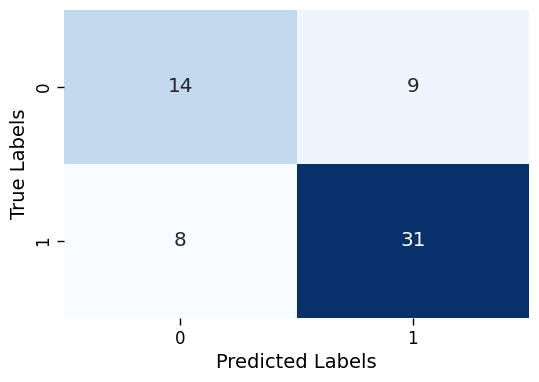

ROC-AUC Score for Soft Voting: 0.8673


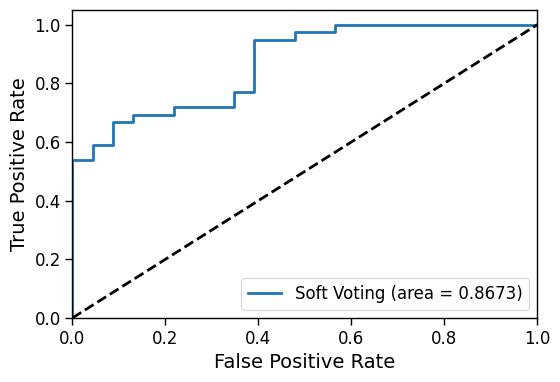

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_synthesized, y_synthesized)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_synthesized, y_synthesized)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


# Test on synthetic

In [ ]:
# Import the necessary modules
from sdv.single_table import CTGANSynthesizer
import pandas as pd
from sdv.metadata import Metadata

def synthesize_data(X_train, X_test, y_train, y_test):
    # Ensure y_train is a pandas Series
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    # Ensure y_train has a name
    if y_train.name is None:
        y_train.name = "target"

    # Ensure X_train is a pandas DataFrame
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)

    # Combine X_train and y_train into a single dataframe
    train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

    metadata = Metadata.detect_from_dataframe(
    data=train_data,
    table_name='stress')

    # Initialize the CTGAN synthesizer
    synthesizer = CTGANSynthesizer(
    metadata, # required
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

    # Fit the synthesizer on the training data
    synthesizer.fit(train_data)

    # Generate synthetic data
    num_samples = 1000  # Generate same number of synthetic samples as original training data
    synthetic_data = synthesizer.sample(num_samples)

    # Split synthetic_data back into X_synthesized and y_synthesized
    X_synthesized = synthetic_data.drop(columns=[y_train.name])
    y_synthesized = synthetic_data[y_train.name]

    return X_synthesized, y_synthesized


# Assuming X_train, X_test, y_train, y_test are already defined
# Generate synthetic data
X_synthesized, y_synthesized = synthesize_data(X_train, X_test, y_train, y_test)

Gen. (-0.12) | Discrim. (-0.46): 100%|██████████| 500/500 [01:23<00:00,  5.99it/s]


In [ ]:
X_synthesized.shape

(1000, 39)

In [ ]:
y_synthesized

0      0
1      1
2      1
3      1
4      0
      ..
995    0
996    0
997    0
998    1
999    1
Name: Occupational_Stress_Target, Length: 1000, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from ctgan import CTGAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

from copulas.multivariate import GaussianMultivariate

def evaluate_model(model, X_train, X_test, y_train, y_test, X_synthetic, y_synthetic):
    """
    Evaluate model performance on original and synthetic data
    """
    # Train on original data, test on original test set
    model.fit(X_train, y_train)
    y_pred_original = model.predict(X_test)
    original_accuracy = accuracy_score(y_test, y_pred_original)

    print("\nModel Performance on Original Test Data:")
    print("----------------------------------------")
    print(f"Accuracy: {original_accuracy:.4f}")
    print("\nClassification Report on Original Test Data:")
    print(classification_report(y_test, y_pred_original, digits = 4))

    # Train on original data, test on synthetic test set
    model.fit(X_train, y_train)
    y_pred_original = model.predict(X_synthetic)
    original_accuracy = accuracy_score(y_synthetic, y_pred_original)

    print("\nModel Performance on Synthetic Test Data:")
    print("----------------------------------------")
    print(f"Accuracy: {original_accuracy:.4f}")
    print("\nClassification Report on Original Test Data:")
    print(classification_report(y_synthetic, y_pred_original, digits = 4))


    # Train on synthetic data, test on original test set
    model_synthetic = model.__class__(**model.get_params())
    model_synthetic.fit(X_synthetic, y_synthetic)
    y_pred_synthetic = model_synthetic.predict(X_test)
    synthetic_accuracy = accuracy_score(y_test, y_pred_synthetic)

    print("\nModel Performance when Trained on Synthetic Data:")
    print("-----------------------------------------------")
    print(f"Accuracy: {synthetic_accuracy:.4f}")
    print("\nClassification Report when Trained on Synthetic Data:")
    print(classification_report(y_test, y_pred_synthetic, digits = 4))

    return original_accuracy, synthetic_accuracy

# Model Selection

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# import numpy as np



# Hyperparameter Optimization - Randomized Search CV

In [ ]:
# Define model hyperparameter spaces
param_distributions = {
    'GaussianNB': {},  # Naive Bayes doesn't have relevant hyperparameters for tuning in this context
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'LGBMClassifier': {
        'num_leaves': [31, 62, 127],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [100, 200, 300]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 6, 9]
    },
    'LinearRegression': {},  # Linear Regression typically does not need hyperparameter tuning for most cases
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'lbfgs']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Instantiate models
models = {
    'GaussianNB': GaussianNB(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'LGBMClassifier': LGBMClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LinearRegression': LinearRegression(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

best_params = {}

for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}")
    clf = RandomizedSearchCV(model, param_distributions[model_name], n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_params[model_name] = clf.best_params_
    print(f"Best parameters for {model_name}: {clf.best_params_}")

Running RandomizedSearchCV for GaussianNB
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for GaussianNB: {}
Running RandomizedSearchCV for DecisionTreeClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for DecisionTreeClassifier: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Running RandomizedSearchCV for RandomForestClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Running RandomizedSearchCV for AdaBoostClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for AdaBoostClassifier: {'n_estimators': 50, 'learning_rate': 0.1}
Running RandomizedSearchCV for LGBMClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [

# Model Training and Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():

    if model_name == 'LinearRegression':
      continue
    print(model_name)

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    evaluate_model(optimized_model, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

GaussianNB

Model Performance on Original Test Data:
----------------------------------------
Accuracy: 0.7097

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.6087    0.6087    0.6087        23
           1     0.7692    0.7692    0.7692        39

    accuracy                         0.7097        62
   macro avg     0.6890    0.6890    0.6890        62
weighted avg     0.7097    0.7097    0.7097        62


Model Performance on Synthetic Test Data:
----------------------------------------
Accuracy: 0.5850

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.5606    0.5235    0.5414       468
           1     0.6039    0.6391    0.6210       532

    accuracy                         0.5850      1000
   macro avg     0.5823    0.5813    0.5812      1000
weighted avg     0.5837    0.5850    0.5838      1000


Model Performance when Trained on Synthet

# Ensemble Model Creation (Later)

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9474    0.7826    0.8571        23
           1     0.8837    0.9744    0.9268        39

    accuracy                         0.9032        62
   macro avg     0.9155    0.8785    0.8920        62
weighted avg     0.9073    0.9032    0.9010        62



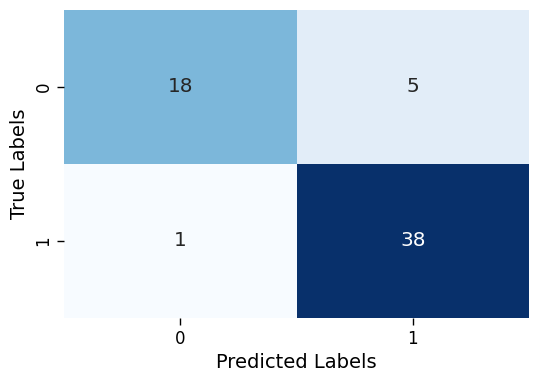

ROC-AUC Score for Hard Voting: 0.8785


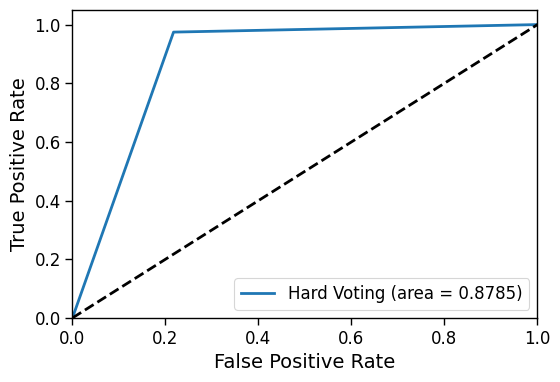


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



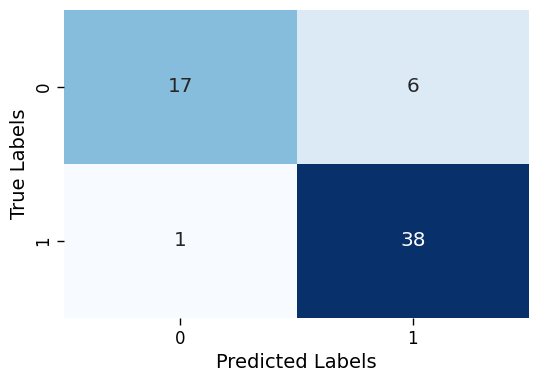

ROC-AUC Score for Soft Voting: 0.8673


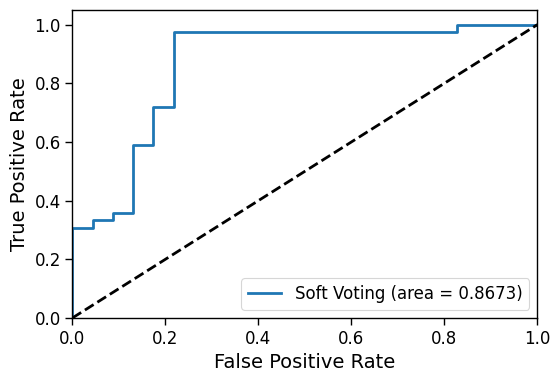

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.6000    0.6522    0.6250        23
           1     0.7838    0.7436    0.7632        39

    accuracy                         0.7097        62
   macro avg     0.6919    0.6979    0.6941        62
weighted avg     0.7156    0.7097    0.7119        62



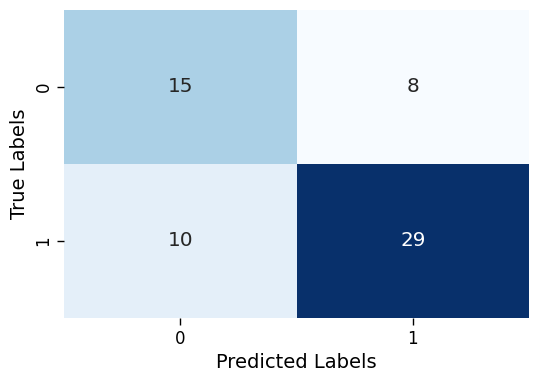

ROC-AUC Score for Hard Voting: 0.6979


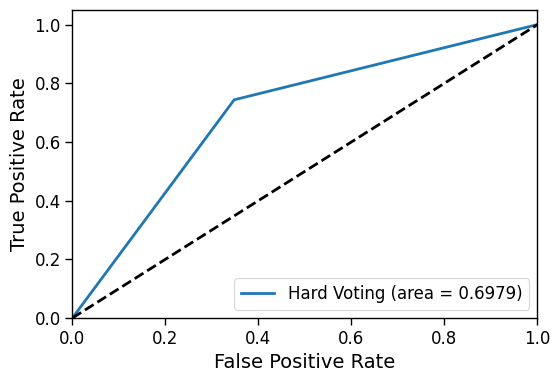


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.5833    0.6087    0.5957        23
           1     0.7632    0.7436    0.7532        39

    accuracy                         0.6935        62
   macro avg     0.6732    0.6761    0.6745        62
weighted avg     0.6964    0.6935    0.6948        62



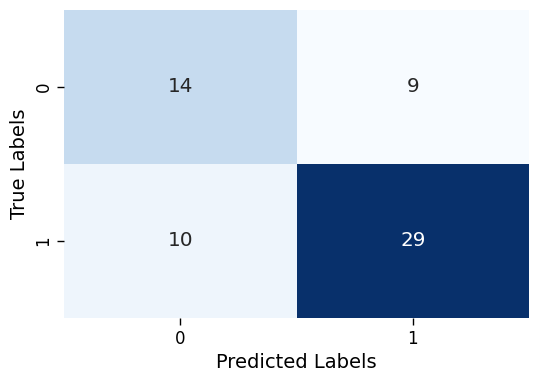

ROC-AUC Score for Soft Voting: 0.7871


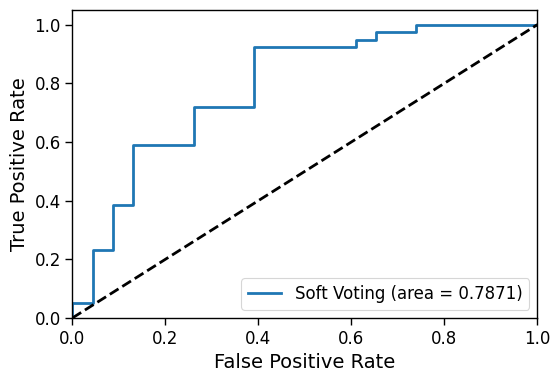

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_synthesized, y_synthesized)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_synthesized, y_synthesized)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.4762    0.1923    0.2740       468
           1     0.5339    0.8139    0.6448       532

    accuracy                         0.5230      1000
   macro avg     0.5050    0.5031    0.4594      1000
weighted avg     0.5069    0.5230    0.4713      1000



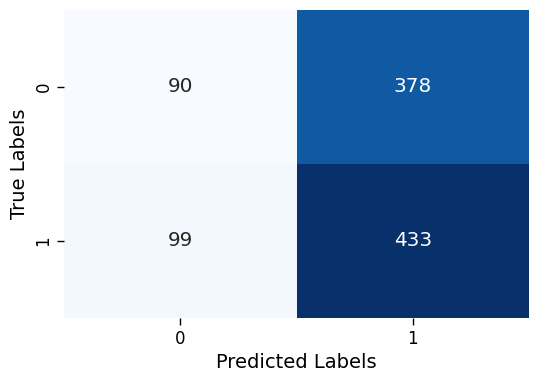

ROC-AUC Score for Hard Voting: 0.5031


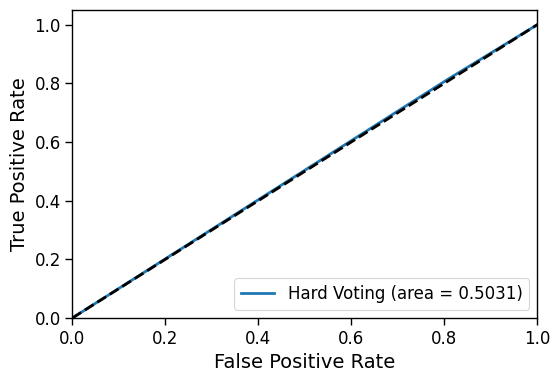


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.4912    0.1795    0.2629       468
           1     0.5368    0.8365    0.6539       532

    accuracy                         0.5290      1000
   macro avg     0.5140    0.5080    0.4584      1000
weighted avg     0.5155    0.5290    0.4709      1000



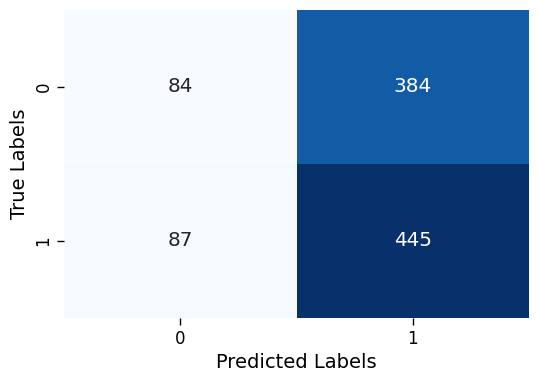

ROC-AUC Score for Soft Voting: 0.5546


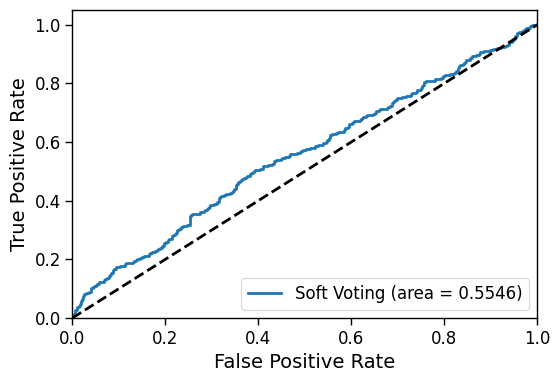

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_synthesized)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_synthesized)[:, 1]
    else:
        y_proba = clf.predict(X_synthesized)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_synthesized, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_synthesized, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_synthesized, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_synthesized, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [ ]:
# Import the necessary modules
from sdv.single_table import GaussianCopulaSynthesizer
import pandas as pd
from sdv.metadata import Metadata

def synthesize_data(X_train, X_test, y_train, y_test):
    # Ensure y_train is a pandas Series
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    # Ensure y_train has a name
    if y_train.name is None:
        y_train.name = "target"

    # Ensure X_train is a pandas DataFrame
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)

    # Combine X_train and y_train into a single dataframe
    train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

    metadata = Metadata.detect_from_dataframe(
    data=train_data,
    table_name='stress')

    # Initialize the CTGAN synthesizer
    synthesizer = GaussianCopulaSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False
)

    # Fit the synthesizer on the training data
    synthesizer.fit(train_data)

    # Generate synthetic data
    num_samples = 1000  # Generate same number of synthetic samples as original training data
    synthetic_data = synthesizer.sample(num_samples)

    # Split synthetic_data back into X_synthesized and y_synthesized
    X_synthesized = synthetic_data.drop(columns=[y_train.name])
    y_synthesized = synthetic_data[y_train.name]

    return X_synthesized, y_synthesized


# Assuming X_train, X_test, y_train, y_test are already defined
# Generate synthetic data
X_synthesized, y_synthesized = synthesize_data(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():

    if model_name == 'LinearRegression':
      continue
    print(model_name)

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    evaluate_model(optimized_model, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

GaussianNB

Model Performance on Original Test Data:
----------------------------------------
Accuracy: 0.7097

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.6087    0.6087    0.6087        23
           1     0.7692    0.7692    0.7692        39

    accuracy                         0.7097        62
   macro avg     0.6890    0.6890    0.6890        62
weighted avg     0.7097    0.7097    0.7097        62


Model Performance on Synthetic Test Data:
----------------------------------------
Accuracy: 0.6500

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.5484    0.2772    0.3682       368
           1     0.6732    0.8671    0.7580       632

    accuracy                         0.6500      1000
   macro avg     0.6108    0.5721    0.5631      1000
weighted avg     0.6273    0.6500    0.6145      1000


Model Performance when Trained on Synthet

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9474    0.7826    0.8571        23
           1     0.8837    0.9744    0.9268        39

    accuracy                         0.9032        62
   macro avg     0.9155    0.8785    0.8920        62
weighted avg     0.9073    0.9032    0.9010        62



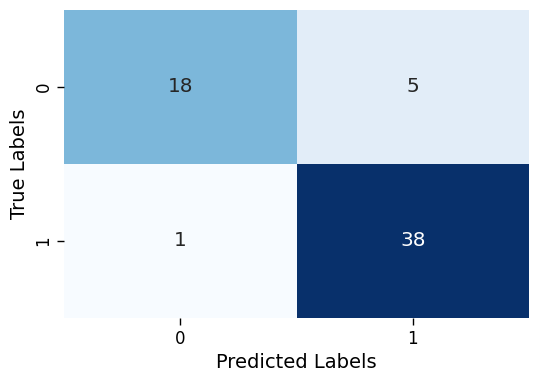

ROC-AUC Score for Hard Voting: 0.8785


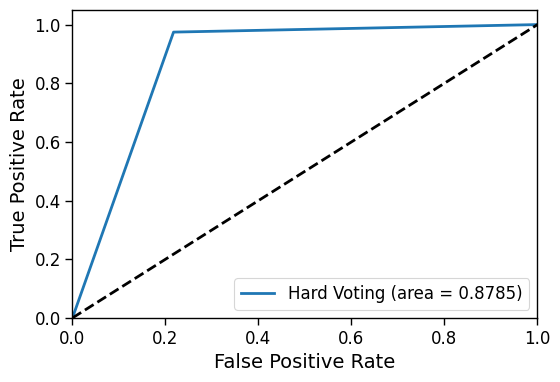


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



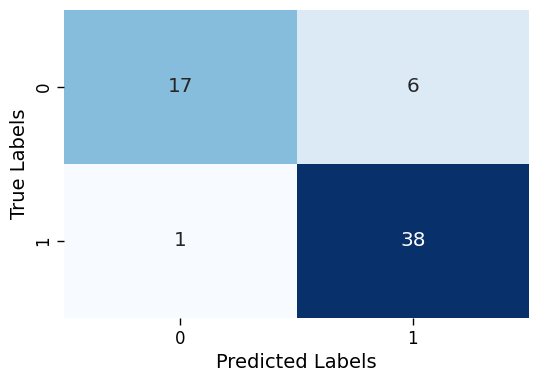

ROC-AUC Score for Soft Voting: 0.8673


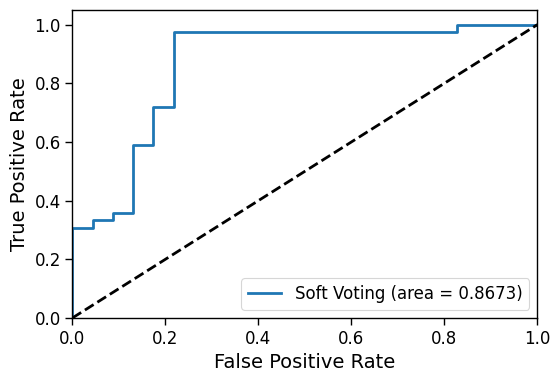

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.8889    0.6957    0.7805        23
           1     0.8409    0.9487    0.8916        39

    accuracy                         0.8548        62
   macro avg     0.8649    0.8222    0.8360        62
weighted avg     0.8587    0.8548    0.8504        62



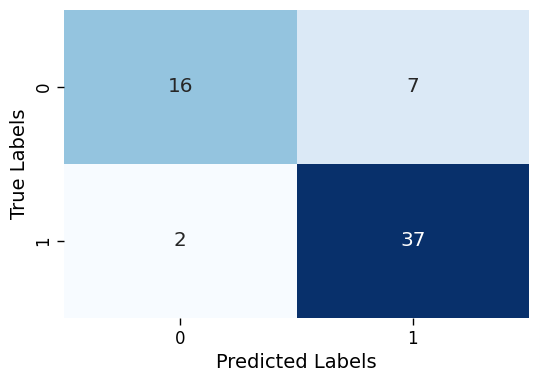

ROC-AUC Score for Hard Voting: 0.8222


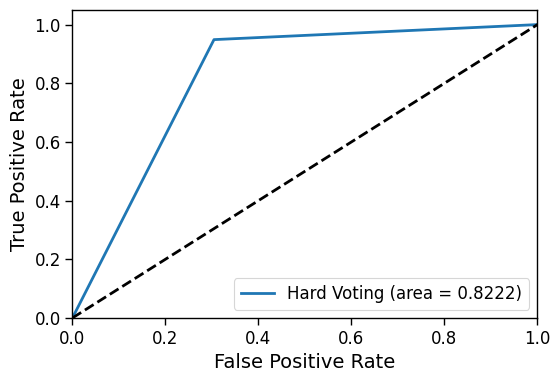


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.8421    0.6957    0.7619        23
           1     0.8372    0.9231    0.8780        39

    accuracy                         0.8387        62
   macro avg     0.8397    0.8094    0.8200        62
weighted avg     0.8390    0.8387    0.8350        62



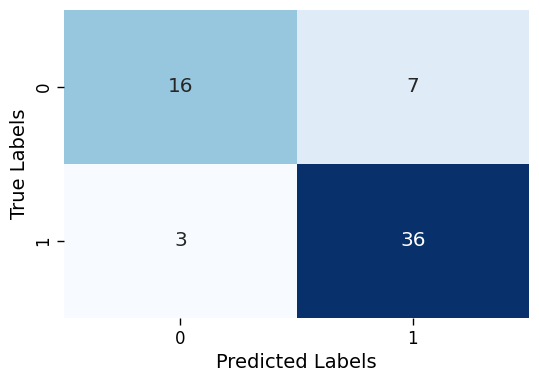

ROC-AUC Score for Soft Voting: 0.8751


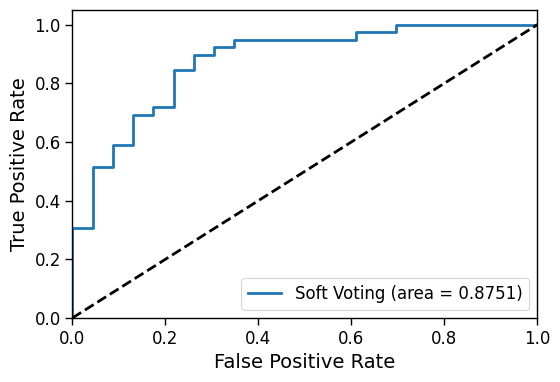

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_synthesized, y_synthesized)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_synthesized, y_synthesized)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.7654    0.1685    0.2762       368
           1     0.6670    0.9699    0.7905       632

    accuracy                         0.6750      1000
   macro avg     0.7162    0.5692    0.5333      1000
weighted avg     0.7032    0.6750    0.6012      1000



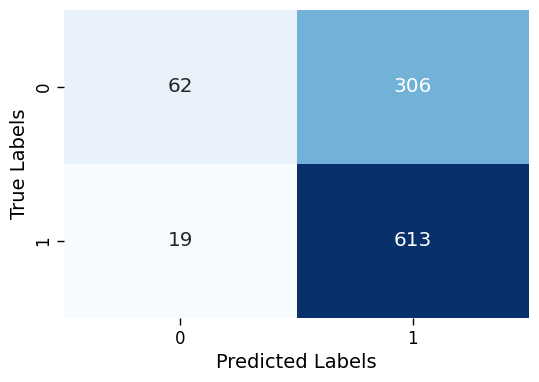

ROC-AUC Score for Hard Voting: 0.5692


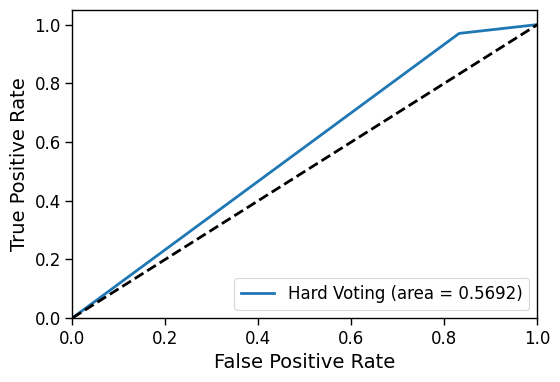


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.7407    0.1630    0.2673       368
           1     0.6649    0.9668    0.7879       632

    accuracy                         0.6710      1000
   macro avg     0.7028    0.5649    0.5276      1000
weighted avg     0.6928    0.6710    0.5963      1000



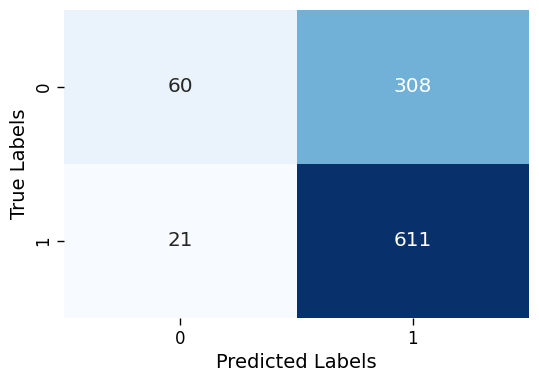

ROC-AUC Score for Soft Voting: 0.6979


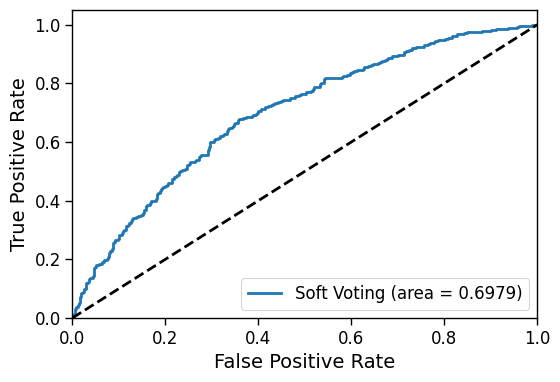

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_synthesized)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_synthesized)[:, 1]
    else:
        y_proba = clf.predict(X_synthesized)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_synthesized, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_synthesized, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_synthesized, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_synthesized, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [ ]:
# Import the necessary modules
from sdv.single_table import TVAESynthesizer
import pandas as pd
from sdv.metadata import Metadata

def synthesize_data(X_train, X_test, y_train, y_test):
    # Ensure y_train is a pandas Series
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    # Ensure y_train has a name
    if y_train.name is None:
        y_train.name = "target"

    # Ensure X_train is a pandas DataFrame
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)

    # Combine X_train and y_train into a single dataframe
    train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

    metadata = Metadata.detect_from_dataframe(
    data=train_data,
    table_name='stress')

    # Initialize the CTGAN synthesizer
    synthesizer = TVAESynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

    # Fit the synthesizer on the training data
    synthesizer.fit(train_data)

    # Generate synthetic data
    num_samples = 1000  # Generate same number of synthetic samples as original training data
    synthetic_data = synthesizer.sample(num_samples)

    # Split synthetic_data back into X_synthesized and y_synthesized
    X_synthesized = synthetic_data.drop(columns=[y_train.name])
    y_synthesized = synthetic_data[y_train.name]

    return X_synthesized, y_synthesized


# Assuming X_train, X_test, y_train, y_test are already defined
# Generate synthetic data
X_synthesized, y_synthesized = synthesize_data(X_train, X_test, y_train, y_test)

Loss: -128.551: 100%|██████████| 500/500 [00:29<00:00, 16.71it/s]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():

    if model_name == 'LinearRegression':
      continue
    print(model_name)

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    evaluate_model(optimized_model, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

GaussianNB

Model Performance on Original Test Data:
----------------------------------------
Accuracy: 0.7097

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.6087    0.6087    0.6087        23
           1     0.7692    0.7692    0.7692        39

    accuracy                         0.7097        62
   macro avg     0.6890    0.6890    0.6890        62
weighted avg     0.7097    0.7097    0.7097        62


Model Performance on Synthetic Test Data:
----------------------------------------
Accuracy: 0.8910

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.7639    0.5946    0.6687       185
           1     0.9124    0.9583    0.9348       815

    accuracy                         0.8910      1000
   macro avg     0.8381    0.7764    0.8017      1000
weighted avg     0.8849    0.8910    0.8855      1000


Model Performance when Trained on Synthet

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9474    0.7826    0.8571        23
           1     0.8837    0.9744    0.9268        39

    accuracy                         0.9032        62
   macro avg     0.9155    0.8785    0.8920        62
weighted avg     0.9073    0.9032    0.9010        62



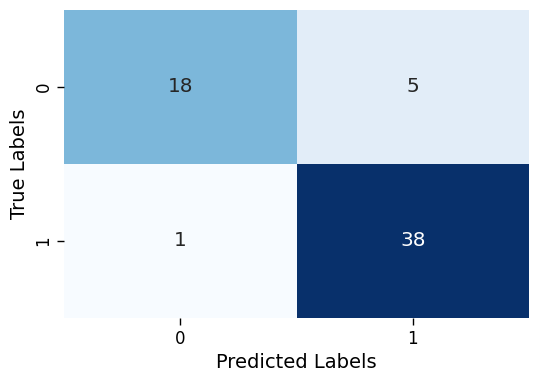

ROC-AUC Score for Hard Voting: 0.8785


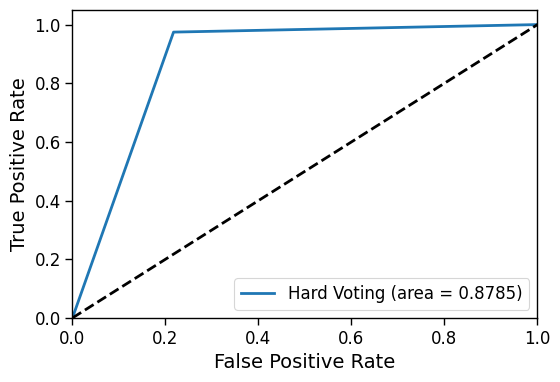


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



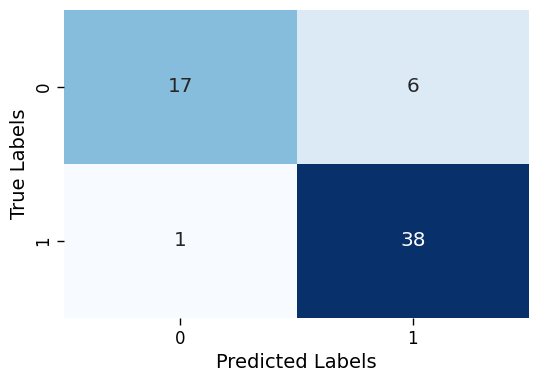

ROC-AUC Score for Soft Voting: 0.8673


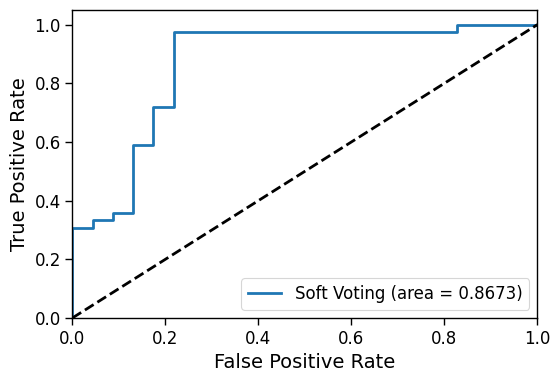

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.7500    0.7826    0.7660        23
           1     0.8684    0.8462    0.8571        39

    accuracy                         0.8226        62
   macro avg     0.8092    0.8144    0.8116        62
weighted avg     0.8245    0.8226    0.8233        62



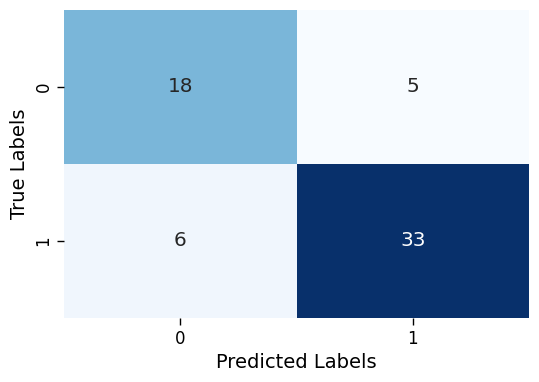

ROC-AUC Score for Hard Voting: 0.8144


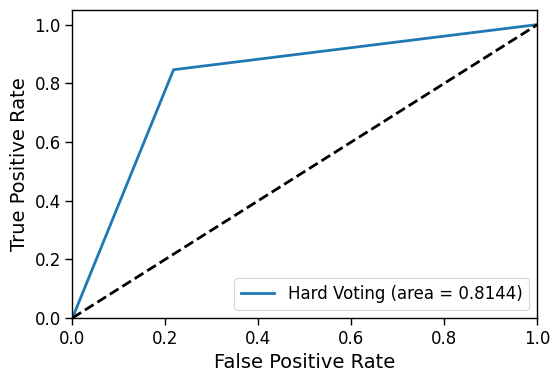


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.7500    0.7826    0.7660        23
           1     0.8684    0.8462    0.8571        39

    accuracy                         0.8226        62
   macro avg     0.8092    0.8144    0.8116        62
weighted avg     0.8245    0.8226    0.8233        62



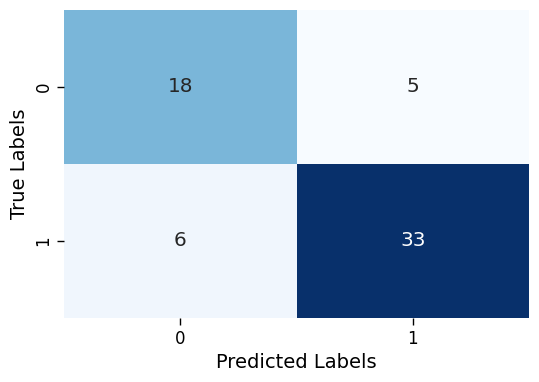

ROC-AUC Score for Soft Voting: 0.8484


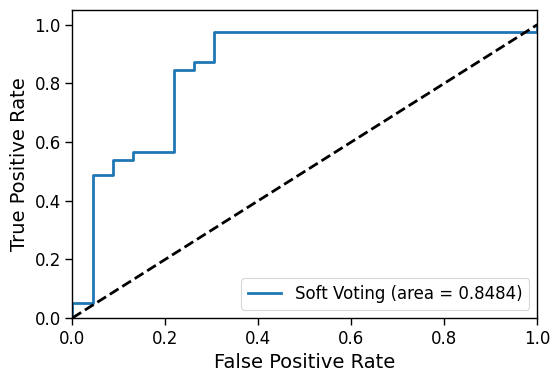

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_synthesized, y_synthesized)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_synthesized, y_synthesized)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.8713    0.4757    0.6154       185
           1     0.8921    0.9840    0.9358       815

    accuracy                         0.8900      1000
   macro avg     0.8817    0.7299    0.7756      1000
weighted avg     0.8883    0.8900    0.8765      1000



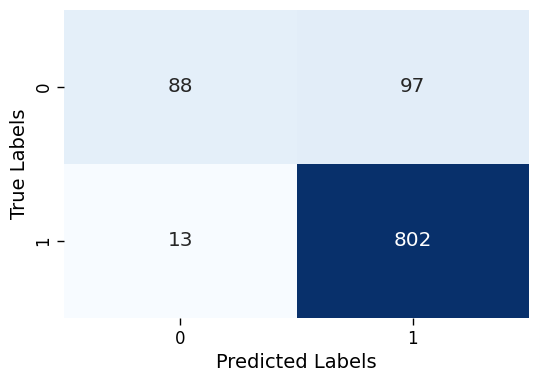

ROC-AUC Score for Hard Voting: 0.7299


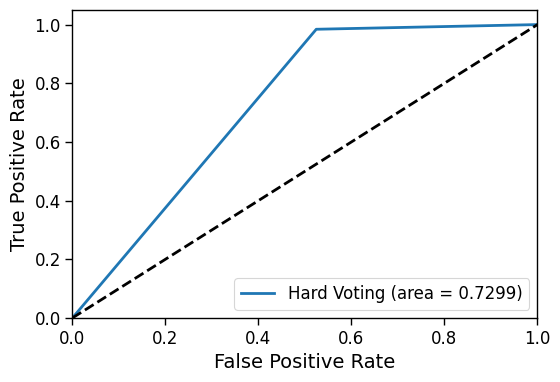


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.8571    0.4865    0.6207       185
           1     0.8939    0.9816    0.9357       815

    accuracy                         0.8900      1000
   macro avg     0.8755    0.7340    0.7782      1000
weighted avg     0.8871    0.8900    0.8774      1000



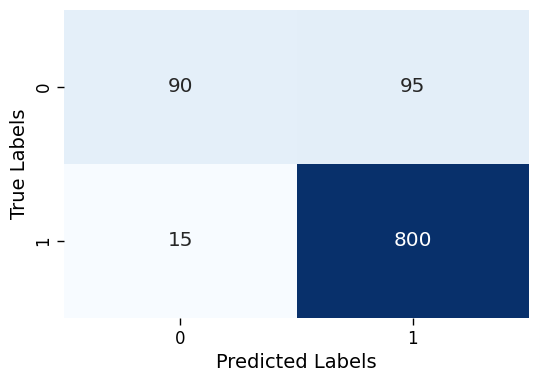

ROC-AUC Score for Soft Voting: 0.9385


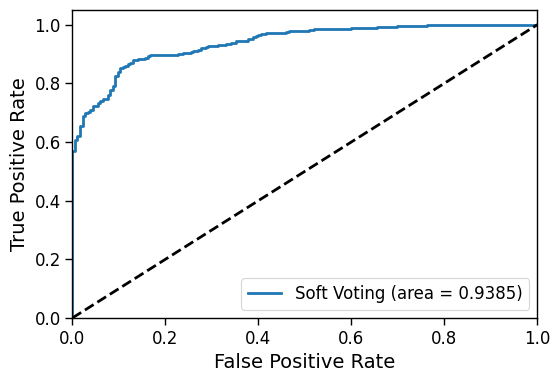

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_synthesized)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_synthesized)[:, 1]
    else:
        y_proba = clf.predict(X_synthesized)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_synthesized, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_synthesized, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_synthesized, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_synthesized, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


In [ ]:
# Import the necessary modules
from sdv.single_table import CopulaGANSynthesizer
import pandas as pd
from sdv.metadata import Metadata

def synthesize_data(X_train, X_test, y_train, y_test):
    # Ensure y_train is a pandas Series
    if not isinstance(y_train, pd.Series):
        y_train = pd.Series(y_train)
    # Ensure y_train has a name
    if y_train.name is None:
        y_train.name = "target"

    # Ensure X_train is a pandas DataFrame
    if not isinstance(X_train, pd.DataFrame):
        X_train = pd.DataFrame(X_train)

    # Combine X_train and y_train into a single dataframe
    train_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

    metadata = Metadata.detect_from_dataframe(
    data=train_data,
    table_name='stress')

    # Initialize the CTGAN synthesizer
    synthesizer = CopulaGANSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    epochs=500,
    verbose=True
)

    # Fit the synthesizer on the training data
    synthesizer.fit(train_data)

    # Generate synthetic data
    num_samples = 1000  # Generate same number of synthetic samples as original training data
    synthetic_data = synthesizer.sample(num_samples)

    # Split synthetic_data back into X_synthesized and y_synthesized
    X_synthesized = synthetic_data.drop(columns=[y_train.name])
    y_synthesized = synthetic_data[y_train.name]

    return X_synthesized, y_synthesized


# Assuming X_train, X_test, y_train, y_test are already defined
# Generate synthetic data
X_synthesized, y_synthesized = synthesize_data(X_train, X_test, y_train, y_test)

Gen. (-1.60) | Discrim. (0.11): 100%|██████████| 500/500 [01:28<00:00,  5.63it/s]


In [ ]:
# Assuming X_train is your DataFrame
null_rows = X_synthesized.isnull().any(axis=1)
num_null_rows = null_rows.sum()

print(f"Number of rows containing null values: {num_null_rows}")

Number of rows containing null values: 1


In [ ]:
X_synthesized = X_synthesized[~null_rows]
y_synthesized = y_synthesized[~null_rows]

In [ ]:
# Assuming X_train is your DataFrame
null_rows = X_synthesized.isnull().any(axis=1)
num_null_rows = null_rows.sum()

print(f"Number of rows containing null values: {num_null_rows}")

Number of rows containing null values: 0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

for model_name, model in models.items():

    if model_name == 'LinearRegression':
      continue
    print(model_name)

    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    evaluate_model(optimized_model, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

GaussianNB

Model Performance on Original Test Data:
----------------------------------------
Accuracy: 0.7097

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.6087    0.6087    0.6087        23
           1     0.7692    0.7692    0.7692        39

    accuracy                         0.7097        62
   macro avg     0.6890    0.6890    0.6890        62
weighted avg     0.7097    0.7097    0.7097        62


Model Performance on Synthetic Test Data:
----------------------------------------
Accuracy: 0.5636

Classification Report on Original Test Data:
              precision    recall  f1-score   support

           0     0.5735    0.2591    0.3569       467
           1     0.5609    0.8308    0.6697       532

    accuracy                         0.5636       999
   macro avg     0.5672    0.5450    0.5133       999
weighted avg     0.5668    0.5636    0.5235       999


Model Performance when Trained on Synthet

Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.9474    0.7826    0.8571        23
           1     0.8837    0.9744    0.9268        39

    accuracy                         0.9032        62
   macro avg     0.9155    0.8785    0.8920        62
weighted avg     0.9073    0.9032    0.9010        62



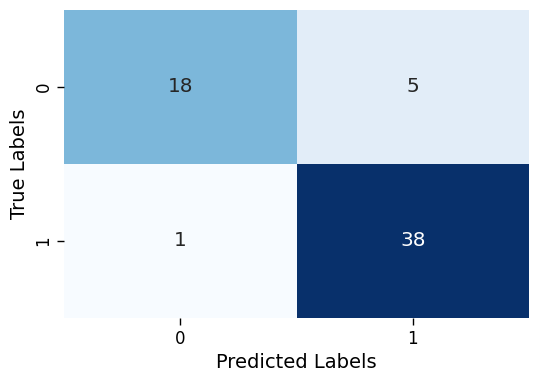

ROC-AUC Score for Hard Voting: 0.8785


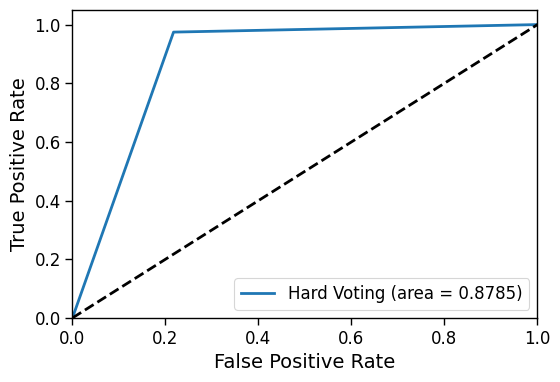


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.9444    0.7391    0.8293        23
           1     0.8636    0.9744    0.9157        39

    accuracy                         0.8871        62
   macro avg     0.9040    0.8567    0.8725        62
weighted avg     0.8936    0.8871    0.8836        62



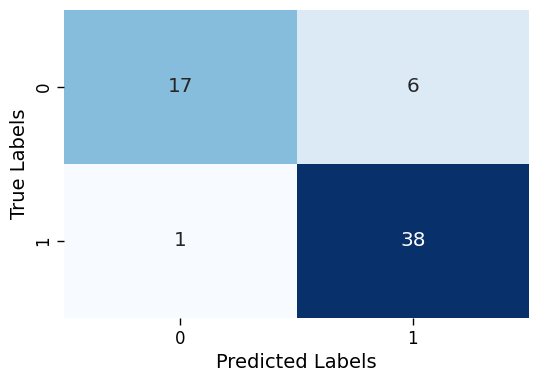

ROC-AUC Score for Soft Voting: 0.8685


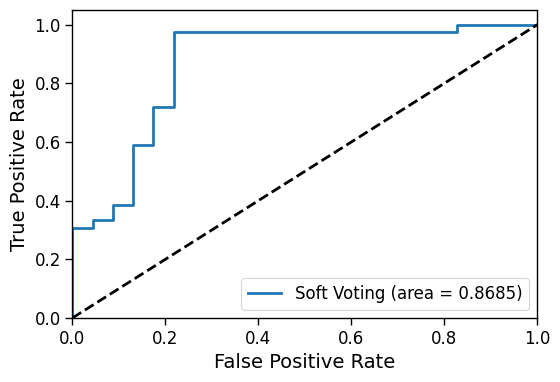

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)
plt.rcParams['figure.figsize'] = [6, 4]  # Set default figure size

# Assuming best_params dict contains optimal parameters for all models
rf_best = RandomForestClassifier(**best_params['RandomForestClassifier'])
ada_best = AdaBoostClassifier(**best_params['AdaBoostClassifier'])
xgb_best = XGBClassifier(**best_params['XGBClassifier'])
lr_best = LogisticRegression(**best_params['LogisticRegression'])
svc_best = SVC(**best_params['SVC'], probability=True)  # Enable probability for soft voting

# Create a VotingClassifier for hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='hard'
)

# Create a VotingClassifier for soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        # ('rf', rf_best),
        # ('ada', ada_best),
        # ('xgb', xgb_best),
        ('lr', lr_best),
        ('svc', svc_best)
    ],
    voting='soft'
)

# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.6071    0.7391    0.6667        23
           1     0.8235    0.7179    0.7671        39

    accuracy                         0.7258        62
   macro avg     0.7153    0.7285    0.7169        62
weighted avg     0.7433    0.7258    0.7299        62



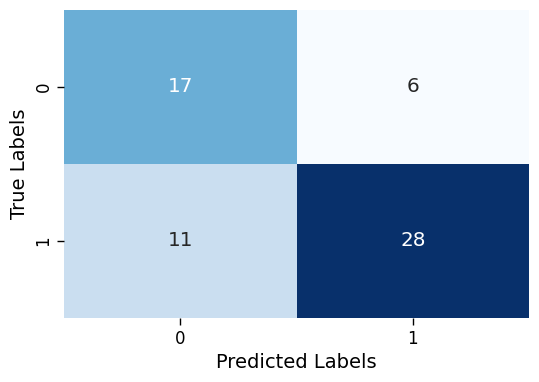

ROC-AUC Score for Hard Voting: 0.7285


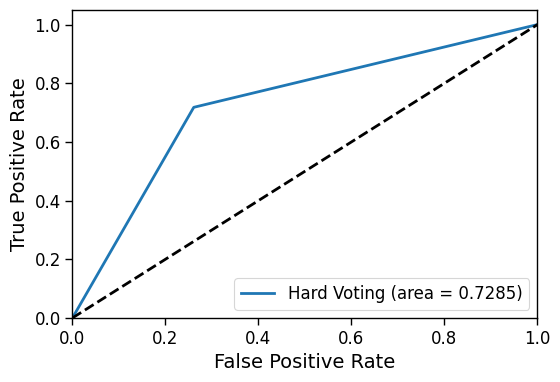


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.6538    0.7391    0.6939        23
           1     0.8333    0.7692    0.8000        39

    accuracy                         0.7581        62
   macro avg     0.7436    0.7542    0.7469        62
weighted avg     0.7667    0.7581    0.7606        62



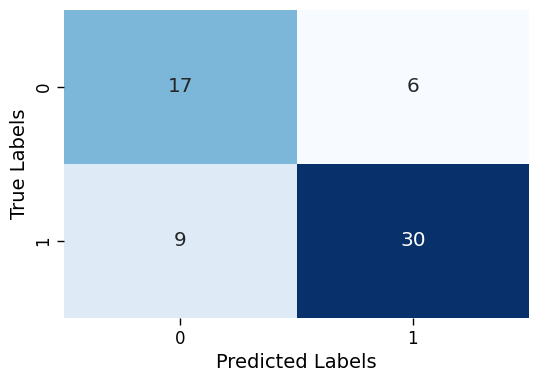

ROC-AUC Score for Soft Voting: 0.7938


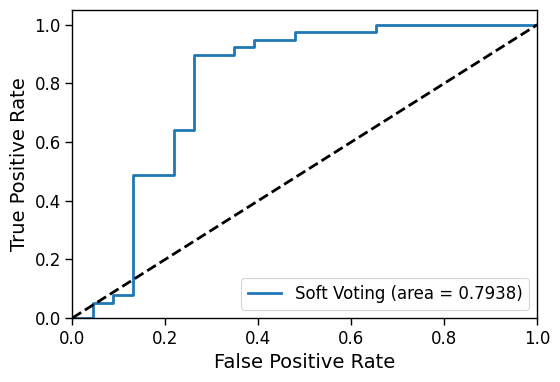

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_synthesized, y_synthesized)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_synthesized, y_synthesized)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_test)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.predict(X_test)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


Training hard voting classifier
Training soft voting classifier

Classification Report for Hard Voting:
              precision    recall  f1-score   support

           0     0.5667    0.1092    0.1831       467
           1     0.5424    0.9267    0.6842       532

    accuracy                         0.5445       999
   macro avg     0.5545    0.5179    0.4337       999
weighted avg     0.5537    0.5445    0.4500       999



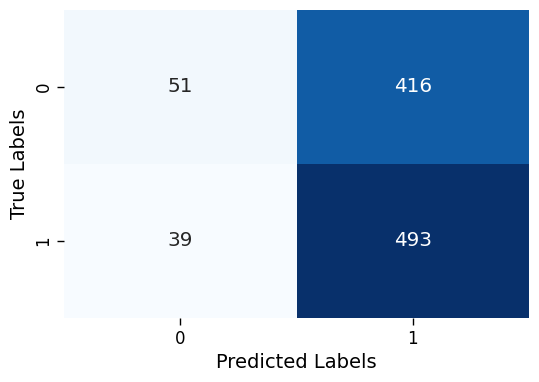

ROC-AUC Score for Hard Voting: 0.5179


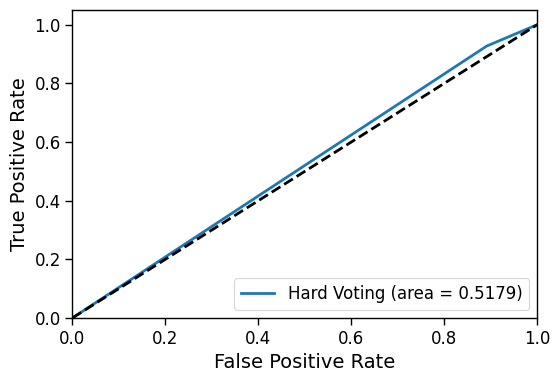


Classification Report for Soft Voting:
              precision    recall  f1-score   support

           0     0.5875    0.1006    0.1718       467
           1     0.5430    0.9380    0.6878       532

    accuracy                         0.5465       999
   macro avg     0.5652    0.5193    0.4298       999
weighted avg     0.5638    0.5465    0.4466       999



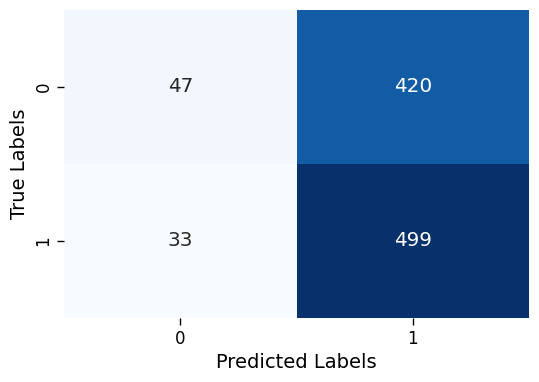

ROC-AUC Score for Soft Voting: 0.5765


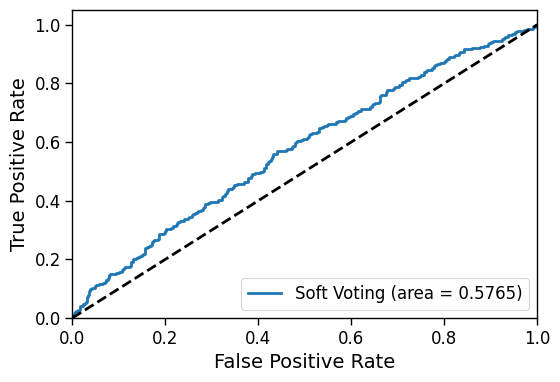

In [ ]:
# Train the hard voting classifier
print("Training hard voting classifier")
voting_clf_hard.fit(X_train, y_train)

# evaluate_model(voting_clf_hard, X_train, X_test, y_train, y_test, X_synthesized, y_synthesized)

# Train the soft voting classifier
print("Training soft voting classifier")
voting_clf_soft.fit(X_train, y_train)

# Evaluate both classifiers
for clf, label in zip([voting_clf_hard, voting_clf_soft], ['Hard Voting', 'Soft Voting']):
    y_pred = clf.predict(X_synthesized)

    # For soft voting, calculate probabilities for ROC-AUC
    if label == 'Soft Voting':
        y_proba = clf.predict_proba(X_synthesized)[:, 1]
    else:
        y_proba = clf.predict(X_synthesized)  # For hard voting, use predictions as probabilities

    print(f"\nClassification Report for {label}:")
    print(classification_report(y_synthesized, y_pred, digits=4))

    # Generate and print the confusion matrix
    cm = confusion_matrix(y_synthesized, y_pred)
    plt.figure(figsize=(6, 4))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    # plt.title(f'Confusion Matrix for {label}', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_synthesized, y_proba)
    print(f"ROC-AUC Score for {label}: {roc_auc:.4f}")

    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(y_synthesized, y_proba)
    plt.figure(figsize=(6, 4))  # Set figure size
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.4f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    # plt.title(f'Receiver Operating Characteristic for {label}', fontsize=16)
    plt.legend(loc="lower right", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


# Model Interpretation (Explainable AI) (Later)

# Model Deployment

# Ablation Study